***E-commerce Marketing and sales***

*Problem statement*: The e-commerce company aims to leverage data-driven insights to enhance customer acquisition, retention, and revenue optimization. The following analysis will be conducted to understand key business trends and improve decision-making.

*Dataset link*: https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7?usp=sharing

*Dataset description*: Dataset Description.docx

*Approach document*: Refer to the document below to help guide you in solving the questions.

https://docs.google.com/document/d/1CubX27YSJSpQJyuc5kBagfPa8AjhsQJFYaE0XgH0KoQ/edit?usp=sharing

**Business questions**:

1. Identify the months with the highest and lowest acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year
2. Analyze the data to determine if certain months consistently show higher or lower monthly acquisitions. How can the company capitalize on high-performing months and improve performance during slower periods?
3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?
4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.
5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?
6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?
7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?
8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?
9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?
10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)
11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?
12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?
13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?
14. Do customers who use coupons have a different average transaction value compared to those who do not?Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?
15. Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?
16. Does customer tenure impact purchase frequency?Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?
17. Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?
18. Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?
19. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?
20. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?

**Evaluation Criteria**

1. *Business Story & Context*: Clarity, relevance, and completeness of the problem narrative.
2. *EDA & Analytical Logic*: Appropriateness of exploratory methods, choice of metrics, and correctness of calculations.
3. *Visualizations*: Quality, readability, and relevance of plots; effective use of visuals to illustrate findings.
4. *Insights & Recommendations*: Depth, originality, and business impact of conclusions and suggested actions.
5. *Notebook Clarity & Reproducibility*: Logical flow, clarity of explanations, clean code structure, and ease of reproducing results directly from the notebook.

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Download the Datasets

# 1. Tax_amount.xlsx
!gdown 1tqJmtKcfhiEJXYVV21ybnD4UaXYW9r4v

# 2. Online_Sales.csv
!gdown 1ZvQn7-UtGSdJa3H9zM4ve_uzACFAzF0Z

# 3. Marketing_Spend.csv
!gdown 1hjHgCluvPEUfrp9w-_-73ch0d9SK6FHf

# 4. Discount_Coupon.csv
!gdown 1CfORUKckP7Qi9swmCe8XEgLLWnpKl4eE

# 5. CustomersData.xlsx
!gdown 1rqihT647UW9HEmERxCrTJrcZZ9xE5TEi

Downloading...
From: https://drive.google.com/uc?id=1tqJmtKcfhiEJXYVV21ybnD4UaXYW9r4v
To: /content/Tax_amount.xlsx
100% 9.84k/9.84k [00:00<00:00, 35.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZvQn7-UtGSdJa3H9zM4ve_uzACFAzF0Z
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 193MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hjHgCluvPEUfrp9w-_-73ch0d9SK6FHf
To: /content/Marketing_Spend.csv
100% 8.67k/8.67k [00:00<00:00, 31.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CfORUKckP7Qi9swmCe8XEgLLWnpKl4eE
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 16.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rqihT647UW9HEmERxCrTJrcZZ9xE5TEi
To: /content/CustomersData.xlsx
100% 42.2k/42.2k [00:00<00:00, 68.0MB/s]


In [ ]:
# Load DataFrames
online_sales_df = pd.read_csv("Online_Sales.csv")
customers_df = pd.read_excel("CustomersData.xlsx")
discount_coupon_df = pd.read_csv("Discount_Coupon.csv")
marketing_spend_df = pd.read_csv("Marketing_Spend.csv")
tax_amount_df = pd.read_excel("Tax_amount.xlsx")

**Business Questions**

(1) Identify the months with the highest and lowest acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year

In [ ]:
# =========================================
# Question 1: Identify the months with the highest and lowest acquisition count
# =========================================

# Convert Transaction_Date to datetime format
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Identify First Purchase per Customer
first_purchase_df = online_sales_df.groupby("CustomerID")["Transaction_Date"].min().reset_index()

# Extract Acquisition Month
first_purchase_df["Acquisition_Month"] = first_purchase_df["Transaction_Date"].dt.month

first_purchase_df["Acquisition_Month_Name"] = first_purchase_df["Transaction_Date"].dt.month_name()

# Monthly Customer Acquisition Count
monthly_acquisition_df = (
    first_purchase_df.groupby(["Acquisition_Month", "Acquisition_Month_Name"])
    .size()
    .reset_index(name="Customer_Acquisitions")
    .sort_values("Acquisition_Month")
)

# Identify Highest & Lowest Acquisition Months
highest_acq = monthly_acquisition_df.loc[monthly_acquisition_df["Customer_Acquisitions"].idxmax()]

lowest_acq = monthly_acquisition_df.loc[monthly_acquisition_df["Customer_Acquisitions"].idxmin()]

print(f"Highest Customer Acquisition Month:\n{highest_acq}\n")
print(f"Lowest Customer Acquisition Month:\n{lowest_acq}\n")

# -----------------------------------------
# What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year
# -----------------------------------------
print(
    "What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year: \n\tCustomer acquisition is heavily concentrated in January, indicating strong seasonality and reliance on early-year demand, while November represents the weakest acquisition period. "
    "This uneven distribution suggests that acquisition performance is driven by campaign timing and customer purchase intent rather than steady organic growth. "
    "To ensure consistent year-round acquisition, the business should rebalance marketing investments toward weaker months, deploy first-time buyer incentives during low-demand periods, "
    "and replicate proven high-performing campaign structures from peak months. "
    "A more evenly distributed acquisition strategy will reduce volatility, stabilize customer inflow, and support sustainable long-term growth."
)

Highest Customer Acquisition Month:
Acquisition_Month               1
Acquisition_Month_Name    January
Customer_Acquisitions         215
Name: 0, dtype: object

Lowest Customer Acquisition Month:
Acquisition_Month               11
Acquisition_Month_Name    November
Customer_Acquisitions           68
Name: 10, dtype: object

What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year: 
	Customer acquisition is heavily concentrated in January, indicating strong seasonality and reliance on early-year demand, while November represents the weakest acquisition period. This uneven distribution suggests that acquisition performance is driven by campaign timing and customer purchase intent rather than steady organic growth. To ensure consistent year-round acquisition, the business should rebalance marketing investments toward weaker months, deploy first-time buyer incentives during low-demand periods, and replicate proven high-performing ca

2. Analyze the data to determine if certain months consistently show higher or lower acquisition. How can the company capitalize on high-performing months and improve performance during slower periods?

In [ ]:
# =========================================
# Question 2: Analyze the data to determine if certain months consistently show higher or lower acquisition
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Identify First Purchase per Customer
first_purchase_df = online_sales_df.groupby("CustomerID")["Transaction_Date"].min().reset_index()

# Extract acquisition month
first_purchase_df["Acquisition_Month"] = first_purchase_df["Transaction_Date"].dt.month

first_purchase_df["Acquisition_Month_Name"] = first_purchase_df["Transaction_Date"].dt.month_name()

# Monthly Customer Acquisition Count
monthly_acquisition_df = (
    first_purchase_df.groupby(["Acquisition_Month", "Acquisition_Month_Name"])
    .size()
    .reset_index(name="Customer_Acquisitions")
    .sort_values("Acquisition_Month")
)

# Identify recurring high and low months
average_acquisition = monthly_acquisition_df["Customer_Acquisitions"].mean()

high_performing_months = monthly_acquisition_df[monthly_acquisition_df["Customer_Acquisitions"] > average_acquisition]

low_performing_months = monthly_acquisition_df[monthly_acquisition_df["Customer_Acquisitions"] < average_acquisition]

print(f"Average Monthly Acquisition: {round(average_acquisition, 2)}\n")

print("High Performing Months:")
print(high_performing_months[["Acquisition_Month_Name", "Customer_Acquisitions"]])
print()

print("Low Performing Months:")
print(low_performing_months[["Acquisition_Month_Name", "Customer_Acquisitions"]])
print()

# -----------------------------------------
# How can the company capitalize on high-performing months and improve performance during slower periods?
# -----------------------------------------
print(
    "How can the company capitalize on high-performing months and improve performance during slower periods: \n\tCustomer acquisition demonstrates a consistent seasonal pattern, with January, March, April, June, and August repeatedly outperforming the annual average, while September through November remain structurally weak. "
    "High-performing months should be maximized by scaling proven marketing campaigns, reinforcing successful product-category promotions, and increasing acquisition budgets where conversion efficiency is highest. "
    "To uplift slower periods, the company should proactively shift spend into underperforming months, introduce targeted first-time buyer incentives, and design event-driven or urgency-based campaigns to stimulate demand. "
    "By systematically transferring successful acquisition playbooks from peak months to low-performing periods, the business can reduce seasonality, stabilize acquisition volumes, and achieve more predictable year-round growth."
)

Average Monthly Acquisition: 122.33

High Performing Months:
  Acquisition_Month_Name  Customer_Acquisitions
0                January                    215
2                  March                    177
3                  April                    163
5                   June                    137
7                 August                    135

Low Performing Months:
   Acquisition_Month_Name  Customer_Acquisitions
1                February                     96
4                     May                    112
6                    July                     94
8               September                     78
9                 October                     87
10               November                     68
11               December                    106

How can the company capitalize on high-performing months and improve performance during slower periods: 
	Customer acquisition demonstrates a consistent seasonal pattern, with January, March, April, June, and August repeatedly outperf

3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

In [ ]:
# =========================================
# Question 3: Identify periods with the strongest and weakest retention rates?
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Create Year-Month column for retention analysis
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

# Create customer-month level dataset
customer_month_df = online_sales_df.groupby(["Year_Month", "CustomerID"]).size().reset_index(name="Orders")

# Sort data to compare consecutive months
customer_month_df = customer_month_df.sort_values(["CustomerID", "Year_Month"])

# Identify if customer returned in the next month
customer_month_df["Next_Month"] = customer_month_df.groupby("CustomerID")["Year_Month"].shift(-1)

customer_month_df["Returned_Next_Month"] = customer_month_df["Next_Month"] == (customer_month_df["Year_Month"] + 1)

# Calculate Monthly Retention Rate
monthly_retention_df = (
    customer_month_df.groupby("Year_Month")
    .agg(Total_Customers=("CustomerID", "nunique"), Retained_Customers=("Returned_Next_Month", "sum"))
    .reset_index()
)

monthly_retention_df["Retention_Rate"] = (
    monthly_retention_df["Retained_Customers"] / monthly_retention_df["Total_Customers"]
)

print("Monthly Retention Rates:")
print(monthly_retention_df)
print()

# Identify Strongest & Weakest Retention Periods
strongest_retention = monthly_retention_df.loc[monthly_retention_df["Retention_Rate"].idxmax()]

weakest_retention = monthly_retention_df.loc[monthly_retention_df["Retention_Rate"].idxmin()]

print(f"Strongest Retention Period:\n{strongest_retention}\n")
print(f"Weakest Retention Period:\n{weakest_retention}\n")

# -----------------------------------------
# What strategies could be implemented to improve retention during weaker months?
# -----------------------------------------
print(
    "What strategies could be implemented to improve retention during weaker months: \n\tCustomer retention varies meaningfully across the year, with mid-year months showing the strongest repeat engagement while year-end periods experience significant drop-offs in returning customers. "
    "Weaker retention months indicate post-purchase disengagement and limited incentives for repeat behavior. "
    "To improve retention during these periods, the business should implement proactive post-purchase communication, personalized re-engagement offers, and time-bound loyalty incentives before the next purchase cycle. "
    "Strengthening retention in low-performing months will increase customer lifetime value, reduce over-reliance on acquisition, and create a more stable and sustainable revenue base."
)

Monthly Retention Rates:
   Year_Month  Total_Customers  Retained_Customers  Retention_Rate
0     2019-01              215                  13        0.060465
1     2019-02              109                  11        0.100917
2     2019-03              208                  24        0.115385
3     2019-04              224                  25        0.111607
4     2019-05              200                  37        0.185000
5     2019-06              259                  58        0.223938
6     2019-07              236                  65        0.275424
7     2019-08              300                  44        0.146667
8     2019-09              193                  29        0.150259
9     2019-10              210                  31        0.147619
10    2019-11              188                  28        0.148936
11    2019-12              236                   0        0.000000

Strongest Retention Period:
Year_Month             2019-07
Total_Customers            236
Retained_Cust

4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.

In [ ]:
# =========================================
# Question 4: Analyze customer behavior during high-retention months.
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Identify Year-Month
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

# Identify High-Retention Month
customer_month_df = (
    online_sales_df.groupby(["Year_Month", "CustomerID"])
    .size()
    .reset_index(name="Orders")
    .sort_values(["CustomerID", "Year_Month"])
)

customer_month_df["Next_Month"] = customer_month_df.groupby("CustomerID")["Year_Month"].shift(-1)

customer_month_df["Returned_Next_Month"] = customer_month_df["Next_Month"] == (customer_month_df["Year_Month"] + 1)

monthly_retention_df = (
    customer_month_df.groupby("Year_Month")
    .agg(Total_Customers=("CustomerID", "nunique"), Retained_Customers=("Returned_Next_Month", "sum"))
    .reset_index()
)

monthly_retention_df["Retention_Rate"] = (
    monthly_retention_df["Retained_Customers"] / monthly_retention_df["Total_Customers"]
)

high_retention_month = monthly_retention_df.loc[monthly_retention_df["Retention_Rate"].idxmax(), "Year_Month"]

print(f"Highest Retention Month: {high_retention_month}\n")

# Analyze Customer Behavior in High-Retention Month
high_retention_df = online_sales_df.loc[online_sales_df["Year_Month"] == high_retention_month].copy()

high_retention_df["Transaction_Value"] = high_retention_df["Quantity"] * high_retention_df["Avg_Price"]

# Product category concentration
category_distribution = high_retention_df.groupby("Product_Category").size().sort_values(ascending=False)

# Coupon usage behavior
coupon_usage_rate = high_retention_df["Coupon_Status"].value_counts(normalize=True)

# Average transaction value
avg_transaction_value = high_retention_df["Transaction_Value"].mean()

print("Top Product Categories in High-Retention Month:")
print(category_distribution)
print()

print("Coupon Usage Distribution in High-Retention Month:")
print(coupon_usage_rate)
print()

print(f"Average Transaction Value in High-Retention Month: {round(avg_transaction_value, 2)}")
print()

# -----------------------------------------
# Suggestion to replicate this success throughout the year.
# -----------------------------------------
print(
    "Suggestion to replicate this success throughout the year: \n\tHigh-retention months are driven by a strong concentration of purchases in a few core product categories, higher average transaction values, and active engagement with discount mechanisms. "
    "This indicates that customers are more likely to return when product relevance, perceived value, and pricing incentives align effectively. "
    "To replicate this performance across the year, the business should consistently promote high-retention product categories, apply proven discount structures, and introduce bundle or upsell strategies to increase basket size during weaker months. "
    "By deliberately extending the conditions that encourage repeat purchasing, the company can improve retention stability and maximize customer lifetime value year-round."
)

Highest Retention Month: 2019-07

Top Product Categories in High-Retention Month:
Product_Category
Apparel                 2182
Nest-USA                1161
Office                   549
Lifestyle                383
Drinkware                298
Bags                     216
Notebooks & Journals     150
Headgear                 119
Bottles                   40
Fun                       35
Nest-Canada               27
Waze                      25
Housewares                22
Google                    12
Gift Cards                10
Android                    8
Backpacks                  8
Accessories                6
dtype: int64

Coupon Usage Distribution in High-Retention Month:
Coupon_Status
Clicked     0.515140
Used        0.334603
Not Used    0.150257
Name: proportion, dtype: float64

Average Transaction Value in High-Retention Month: 70.97

Suggestion to replicate this success throughout the year: 
	High-retention months are driven by a strong concentration of purchases in a few core

5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

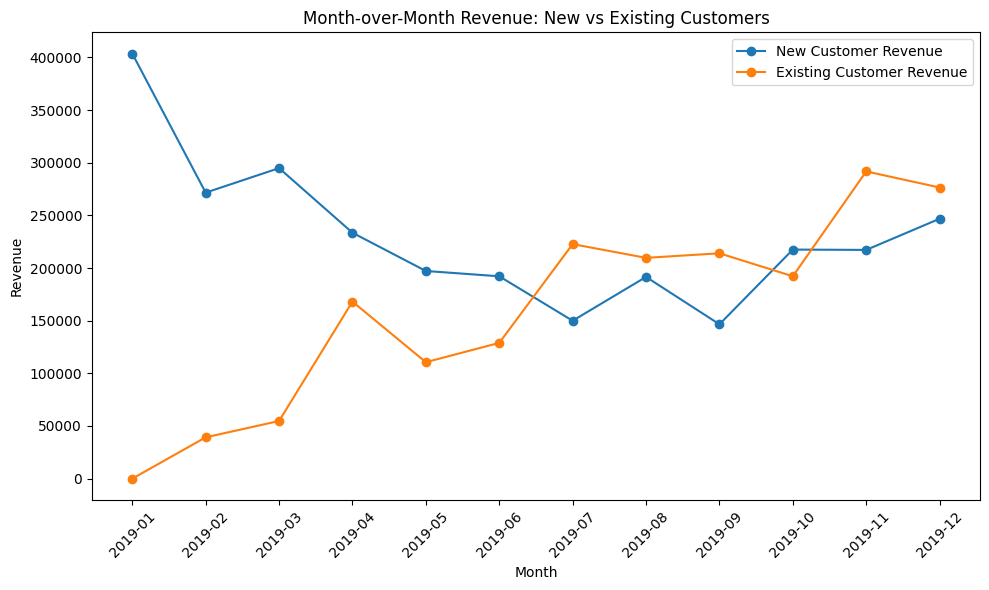




What does this trend suggest about the balance between acquisition and retention efforts: 
	Month-over-month revenue trends show that new customers drive sharp revenue increases during high-acquisition periods, while existing customers contribute more consistent and stable revenue across the year. This indicates that overall growth is predominantly acquisition-led, with retention acting as a stabilizing force rather than a primary growth driver. To achieve a healthier balance, the business should maintain strong acquisition efforts during peak months while scaling retention-focused initiatives such as loyalty programs, repeat-purchase incentives, and personalized offers. Strengthening revenue contribution from existing customers will improve predictability, increase customer lifetime value, and reduce reliance on continuous acquisition.


In [ ]:
# =========================================
# Question 5: Compare the revenue generated by new and existing customers month-over-month.
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Create Year-Month column
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Identify first purchase month for each customer
first_purchase_df = online_sales_df.groupby("CustomerID")["Year_Month"].min().reset_index(name="First_Purchase_Month")

# Classify customers as New or Existing per month
revenue_df = online_sales_df.merge(first_purchase_df, on="CustomerID", how="left")

revenue_df["Customer_Type"] = np.where(
    revenue_df["Year_Month"] == revenue_df["First_Purchase_Month"], "New Customer", "Existing Customer"
)

# Aggregate revenue by month and customer type
monthly_revenue_df = revenue_df.groupby(["Year_Month", "Customer_Type"])["Revenue"].sum().reset_index()

# print("Monthly Revenue Split by Customer Type:")
# print(monthly_revenue_df)
print()

# Prepare data for visualization
monthly_revenue_pivot_df = monthly_revenue_df.pivot(
    index="Year_Month", columns="Customer_Type", values="Revenue"
).fillna(0)

# Plot: Revenue from New vs Existing Customers
plt.figure(figsize=(10, 6))

plt.plot(
    monthly_revenue_pivot_df.index.astype(str),
    monthly_revenue_pivot_df["New Customer"],
    marker="o",
    label="New Customer Revenue",
)

plt.plot(
    monthly_revenue_pivot_df.index.astype(str),
    monthly_revenue_pivot_df["Existing Customer"],
    marker="o",
    label="Existing Customer Revenue",
)

plt.title("Month-over-Month Revenue: New vs Existing Customers")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------
# What does this trend suggest about the balance between acquisition and retention efforts?
# -----------------------------------------
print("\n\n")
print(
    "What does this trend suggest about the balance between acquisition and retention efforts: \n\tMonth-over-month revenue trends show that new customers drive sharp revenue increases during high-acquisition periods, while existing customers contribute more consistent and stable revenue across the year. "
    "This indicates that overall growth is predominantly acquisition-led, with retention acting as a stabilizing force rather than a primary growth driver. "
    "To achieve a healthier balance, the business should maintain strong acquisition efforts during peak months while scaling retention-focused initiatives such as loyalty programs, repeat-purchase incentives, and personalized offers. "
    "Strengthening revenue contribution from existing customers will improve predictability, increase customer lifetime value, and reduce reliance on continuous acquisition."
)

6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?

Revenue Contribution by Coupon Usage:
   Coupon_Used_Flag     Revenue  Revenue_Share
0             False  3109976.52       0.665835
1              True  1560818.10       0.334165

Average Transaction Value (Coupon vs No Coupon):
   Coupon_Used_Flag  Avg_Transaction_Value
0             False              88.805726
1              True              87.177061



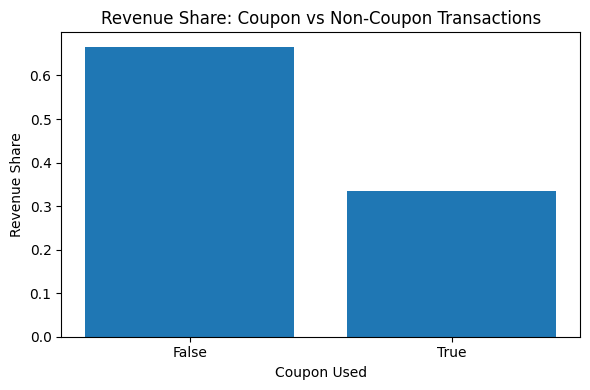

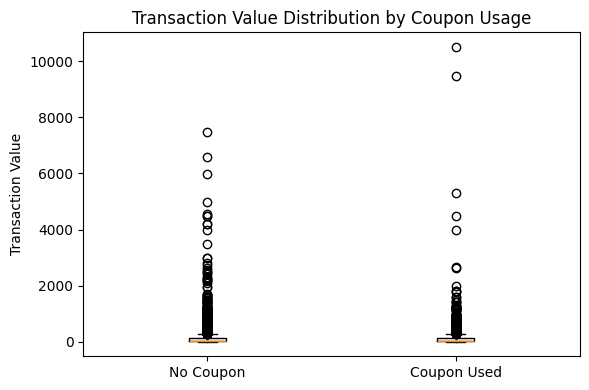




How can discount strategies be optimized to maximize revenue while maintaining profitability:
	Coupon-based transactions account for a substantial portion of total revenue, confirming discounts as a strong volume driver; however, transaction value distribution shows that coupon usage can dilute average order value. This indicates that revenue growth from coupons is primarily volume-led rather than value-led, creating potential margin pressure. To optimize discount effectiveness, the business should move toward targeted coupons with minimum basket thresholds, restrict discounts to high-margin or high-retention categories, and limit blanket promotions. A more disciplined, insight-driven discount strategy will preserve profitability while continuing to use coupons as a lever for incremental demand and engagement.


In [ ]:
# =========================================
# Question 6: Analyze the relationship between coupon usage and revenue generation
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Create Coupon Used Flag
online_sales_df["Coupon_Used_Flag"] = online_sales_df["Coupon_Status"] == "Used"

# Revenue contribution: Coupon vs No Coupon
coupon_revenue_df = online_sales_df.groupby("Coupon_Used_Flag")["Revenue"].sum().reset_index()

coupon_revenue_df["Revenue_Share"] = coupon_revenue_df["Revenue"] / coupon_revenue_df["Revenue"].sum()

print("Revenue Contribution by Coupon Usage:")
print(coupon_revenue_df)
print()

# Average Transaction Value (ATV)
avg_transaction_value_df = (
    online_sales_df.groupby("Coupon_Used_Flag")["Revenue"].mean().reset_index(name="Avg_Transaction_Value")
)

print("Average Transaction Value (Coupon vs No Coupon):")
print(avg_transaction_value_df)
print()

# Visualization 1: Revenue Share
plt.figure(figsize=(6, 4))
plt.bar(coupon_revenue_df["Coupon_Used_Flag"].astype(str), coupon_revenue_df["Revenue_Share"])
plt.title("Revenue Share: Coupon vs Non-Coupon Transactions")
plt.xlabel("Coupon Used")
plt.ylabel("Revenue Share")
plt.tight_layout()
plt.show()

print("\n\n")

# Visualization 2: Transaction Value Distribution
plt.figure(figsize=(6, 4))
plt.boxplot(
    [
        online_sales_df.loc[online_sales_df["Coupon_Used_Flag"] == False, "Revenue"],
        online_sales_df.loc[online_sales_df["Coupon_Used_Flag"] == True, "Revenue"],
    ],
    tick_labels=["No Coupon", "Coupon Used"],
)
plt.title("Transaction Value Distribution by Coupon Usage")
plt.ylabel("Transaction Value")
plt.tight_layout()
plt.show()

# -----------------------------------------
# How can discount strategies be optimized to maximize revenue while maintaining profitability?
# -----------------------------------------
print("\n\n")
print(
    "How can discount strategies be optimized to maximize revenue while maintaining profitability:\n\tCoupon-based transactions account for a substantial portion of total revenue, confirming discounts as a strong volume driver; however, transaction value distribution shows that coupon usage can dilute average order value. "
    "This indicates that revenue growth from coupons is primarily volume-led rather than value-led, creating potential margin pressure. "
    "To optimize discount effectiveness, the business should move toward targeted coupons with minimum basket thresholds, restrict discounts to high-margin or high-retention categories, and limit blanket promotions. "
    "A more disciplined, insight-driven discount strategy will preserve profitability while continuing to use coupons as a lever for incremental demand and engagement."
)

7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional

Top 10 Products by Revenue:
        Product_SKU                                Product_Description  \
981  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
983  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
976  GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
984  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
985  GGOENEBQ079199      Nest Protect Smoke + CO White Wired Alarm-USA   
989  GGOENEBQ084699       Nest Learning Thermostat 3rd Gen-USA - White   
994  GGOENEBQ092299        Nest Secure Alarm System Starter Pack - USA   
990  GGOENEBQ086499                                  Nest Cam IQ - USA   
992  GGOENEBQ086799                            Nest Thermostat E - USA   
980  GGOENEBD084799      Nest Learning Thermostat 3rd Gen-USA - Copper   

    Product_Category  Total_Quantity_Sold  Total_Revenue  
981         Nest-USA                 4570      688916.34  
983         Nest-USA                 52

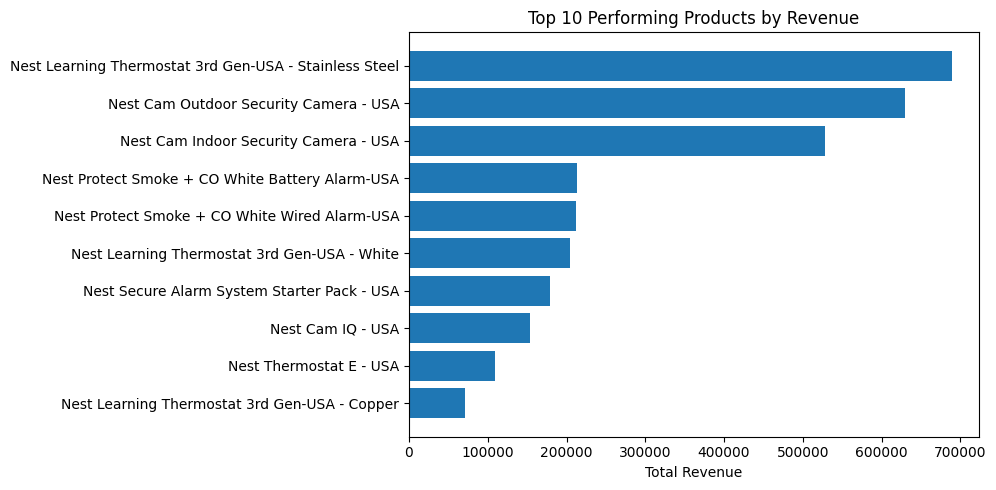




How can this insight inform inventory management and promotional:
	Top-performing products are concentrated within a limited set of categories and consistently deliver both high sales volume and strong revenue contribution, indicating strong product-market fit and sustained customer demand. Their success is likely driven by a combination of attractive pricing, broad appeal, and alignment with frequently purchased categories. These insights suggest that inventory planning should prioritize higher stock levels and faster replenishment cycles for top-performing categories to avoid stockouts and lost sales. From a promotional standpoint, marketing efforts should spotlight these high-performing products through featured placements, bundled offers, and cross-selling strategies to maximize revenue while improving inventory turnover efficiency.


In [ ]:
# =========================================
# Question 7:  Identify the top-performing products and analyze the factors driving their success.
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Aggregate performance at product level
product_performance_df = online_sales_df.groupby(
    ["Product_SKU", "Product_Description", "Product_Category"], as_index=False
).agg(Total_Quantity_Sold=("Quantity", "sum"), Total_Revenue=("Revenue", "sum"))

# Identify Top Products by Revenue
top_products_df = product_performance_df.sort_values("Total_Revenue", ascending=False).head(10)

print("Top 10 Products by Revenue:")
print(top_products_df)
print()

# Category contribution among top products
top_category_distribution = (
    top_products_df.groupby("Product_Category")["Total_Revenue"].sum().sort_values(ascending=False)
)

print("Revenue Contribution by Category (Top Products):")
print(top_category_distribution)
print()

# Visualization: Top Products Revenue
plt.figure(figsize=(10, 5))
plt.barh(top_products_df["Product_Description"], top_products_df["Total_Revenue"])
plt.xlabel("Total Revenue")
plt.title("Top 10 Performing Products by Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -----------------------------------------
# How can this insight inform inventory management and promotional?
# -----------------------------------------
print("\n\n")
print(
    "How can this insight inform inventory management and promotional:\n\tTop-performing products are concentrated within a limited set of categories and consistently deliver both high sales volume and strong revenue contribution, indicating strong product-market fit and sustained customer demand. "
    "Their success is likely driven by a combination of attractive pricing, broad appeal, and alignment with frequently purchased categories. "
    "These insights suggest that inventory planning should prioritize higher stock levels and faster replenishment cycles for top-performing categories to avoid stockouts and lost sales. "
    "From a promotional standpoint, marketing efforts should spotlight these high-performing products through featured placements, bundled offers, and cross-selling strategies to maximize revenue while improving inventory turnover efficiency."
)

8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?

Monthly Revenue, Marketing Spend, and ROI:
   Year_Month    Revenue  Total_Marketing_Spend  ROI_Percentage
0     2019-01  403624.58              154928.95      160.522375
1     2019-02  310819.80              137107.92      126.697189
2     2019-03  349608.09              122250.09      185.977777
3     2019-04  401618.42              157026.83      155.764203
4     2019-05  307763.42              118259.64      160.243833
5     2019-06  321081.38              134318.14      139.045433
6     2019-07  372638.07              120217.85      209.969002
7     2019-08  401210.37              142904.15      180.754877
8     2019-09  360548.40              135514.54      166.058830
9     2019-10  409681.28              151224.65      170.909061
10    2019-11  508942.62              161144.96      215.829065
11    2019-12  523258.19              198648.75      163.408750

Highest ROI Month:
Year_Month                  2019-11
Revenue                   508942.62
Total_Marketing_Spend     161144.

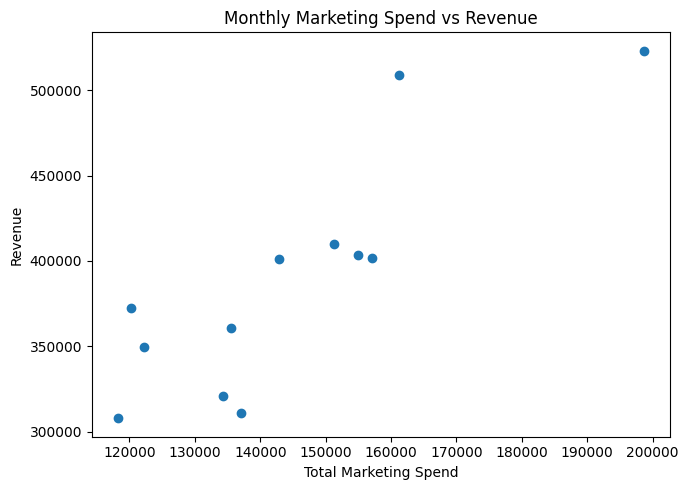

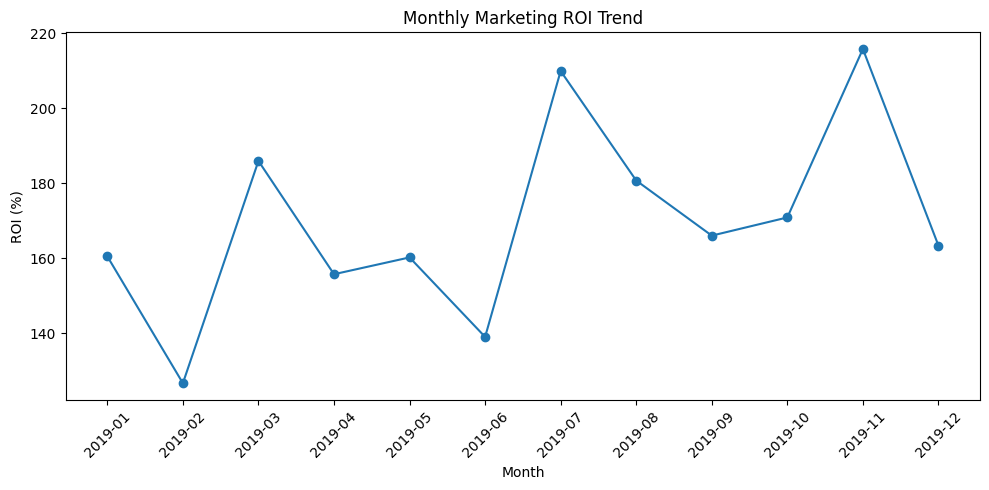




How can marketing strategies be adjusted to improve ROI:
	Monthly analysis shows a non-linear relationship between marketing spend and revenue, with several months delivering disproportionately high or low ROI despite similar spend levels. High-ROI months indicate efficient campaign execution and strong alignment between marketing efforts and customer demand, while low-ROI months suggest spend inefficiencies or weak campaign resonance. To improve overall marketing ROI, the business should reallocate budgets toward months and channels with historically higher returns, reduce spend during low-efficiency periods, and emphasize performance-driven marketing over blanket campaigns. A continuous ROI monitoring framework will enable smarter budget allocation, improve marketing efficiency, and maximize revenue impact per dollar spent.


In [ ]:
# =========================================
# Question 8: Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns?
# =========================================

# Convert dates to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])
marketing_spend_df["Date"] = pd.to_datetime(marketing_spend_df["Date"])

# Create Year-Month column
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

marketing_spend_df["Year_Month"] = marketing_spend_df["Date"].dt.to_period("M")

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Monthly Revenue
monthly_revenue_df = online_sales_df.groupby("Year_Month")["Revenue"].sum().reset_index()

# Monthly Marketing Spend
marketing_spend_df["Total_Marketing_Spend"] = marketing_spend_df["Offline_Spend"] + marketing_spend_df["Online_Spend"]

monthly_marketing_df = marketing_spend_df.groupby("Year_Month")["Total_Marketing_Spend"].sum().reset_index()

# Combine Revenue & Marketing Spend
marketing_roi_df = monthly_revenue_df.merge(monthly_marketing_df, on="Year_Month", how="inner")

# Calculate ROI
# ROI = (Revenue - Marketing Spend) * 100 / Marketing Spend
marketing_roi_df["ROI_Percentage"] = (
    (marketing_roi_df["Revenue"] - marketing_roi_df["Total_Marketing_Spend"])
    * 100
    / marketing_roi_df["Total_Marketing_Spend"]
)

print("Monthly Revenue, Marketing Spend, and ROI:")
print(marketing_roi_df)
print()

# Identify High & Low ROI Months
highest_roi_month = marketing_roi_df.loc[marketing_roi_df["ROI_Percentage"].idxmax()]

lowest_roi_month = marketing_roi_df.loc[marketing_roi_df["ROI_Percentage"].idxmin()]

print(f"Highest ROI Month:\n{highest_roi_month}\n")
print(f"Lowest ROI Month:\n{lowest_roi_month}\n")

# Visualization: Spend vs Revenue
plt.figure(figsize=(7, 5))
plt.scatter(marketing_roi_df["Total_Marketing_Spend"], marketing_roi_df["Revenue"])
plt.xlabel("Total Marketing Spend")
plt.ylabel("Revenue")
plt.title("Monthly Marketing Spend vs Revenue")
plt.tight_layout()
plt.show()

print("\n\n")
# Visualization: ROI Trend by Month
plt.figure(figsize=(10, 5))
plt.plot(marketing_roi_df["Year_Month"].astype(str), marketing_roi_df["ROI_Percentage"], marker="o")
plt.xlabel("Month")
plt.ylabel("ROI (%)")
plt.title("Monthly Marketing ROI Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------
# How can marketing strategies be adjusted to improve ROI?
# -----------------------------------------
print("\n\n")
print(
    "How can marketing strategies be adjusted to improve ROI:\n\tMonthly analysis shows a non-linear relationship between marketing spend and revenue, with several months delivering disproportionately high or low ROI despite similar spend levels. "
    "High-ROI months indicate efficient campaign execution and strong alignment between marketing efforts and customer demand, while low-ROI months suggest spend inefficiencies or weak campaign resonance. "
    "To improve overall marketing ROI, the business should reallocate budgets toward months and channels with historically higher returns, reduce spend during low-efficiency periods, and emphasize performance-driven marketing over blanket campaigns. "
    "A continuous ROI monitoring framework will enable smarter budget allocation, improve marketing efficiency, and maximize revenue impact per dollar spent."
)

9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?

Monthly Marketing Spend Efficiency:
   Year_Month    Revenue  Total_Marketing_Spend  Marketing_Spend_Pct
0     2019-01  403624.58              154928.95            38.384419
1     2019-02  310819.80              137107.92            44.111707
2     2019-03  349608.09              122250.09            34.967752
3     2019-04  401618.42              157026.83            39.098513
4     2019-05  307763.42              118259.64            38.425502
5     2019-06  321081.38              134318.14            41.833052
6     2019-07  372638.07              120217.85            32.261290
7     2019-08  401210.37              142904.15            35.618259
8     2019-09  360548.40              135514.54            37.585672
9     2019-10  409681.28              151224.65            36.912756
10    2019-11  508942.62              161144.96            31.662697
11    2019-12  523258.19              198648.75            37.963811

Most Efficient Marketing Month:
Year_Month                 2019-11

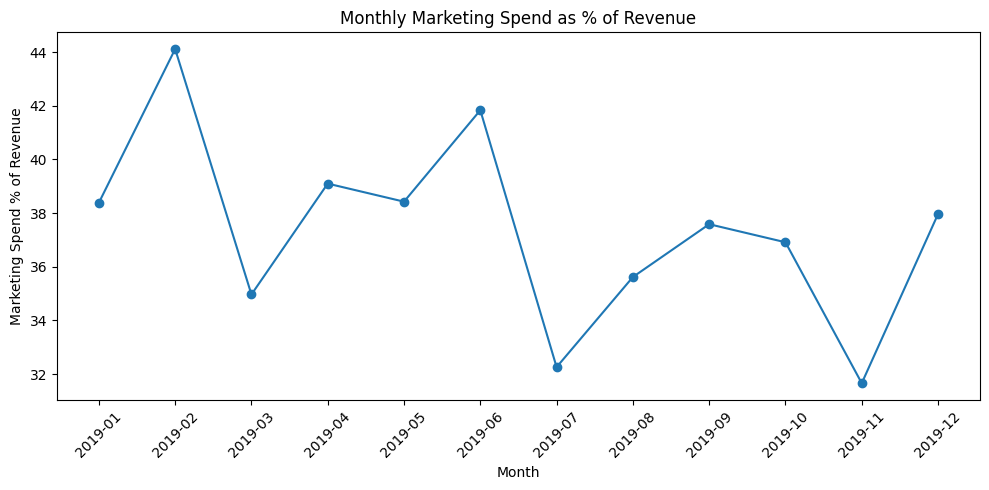

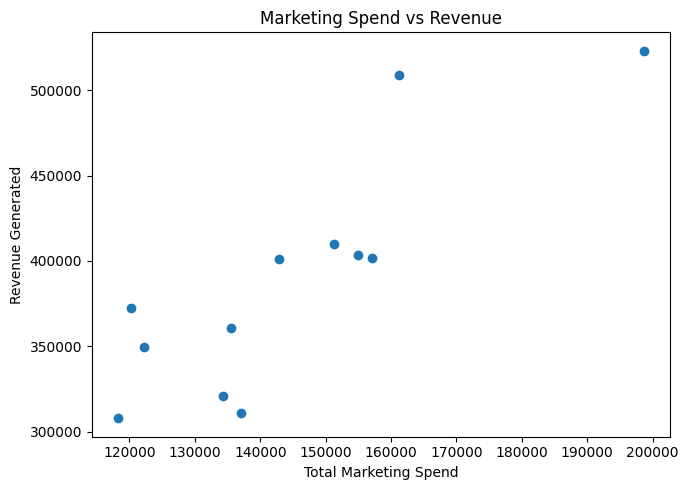




Are there opportunities to reallocate resources for better results:
	Marketing efficiency varies significantly across months, with certain periods generating high revenue at a relatively low marketing spend percentage, indicating strong campaign effectiveness and favorable demand conditions. Conversely, months with a high marketing spend percentage highlight inefficient resource utilization, where increased spend does not translate proportionally into revenue. These insights reveal clear opportunities to reallocate marketing budgets toward historically high-efficiency months, channels, and campaign types while tightening spend controls during low-efficiency periods. By aligning future resource allocation with proven high-return periods, the business can improve marketing ROI, reduce waste, and maximize revenue impact from marketing investments.


In [ ]:
# =========================================
# Question 9: Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated
# =========================================

# Convert dates to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])
marketing_spend_df["Date"] = pd.to_datetime(marketing_spend_df["Date"])

# Create Year-Month column
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

marketing_spend_df["Year_Month"] = marketing_spend_df["Date"].dt.to_period("M")

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Monthly Revenue
monthly_revenue_df = online_sales_df.groupby("Year_Month")["Revenue"].sum().reset_index()

# Monthly Marketing Spend
marketing_spend_df["Total_Marketing_Spend"] = marketing_spend_df["Offline_Spend"] + marketing_spend_df["Online_Spend"]

monthly_marketing_df = marketing_spend_df.groupby("Year_Month")["Total_Marketing_Spend"].sum().reset_index()

# Combine Revenue & Marketing Spend
marketing_efficiency_df = monthly_revenue_df.merge(monthly_marketing_df, on="Year_Month", how="inner")

# Calculate Marketing Spend %
# Market Spend % = (Total Spend * 100) / Revenue
marketing_efficiency_df["Marketing_Spend_Pct"] = (
    marketing_efficiency_df["Total_Marketing_Spend"] * 100 / marketing_efficiency_df["Revenue"]
)

print("Monthly Marketing Spend Efficiency:")
print(marketing_efficiency_df)
print()

# Identify High & Low Efficiency Months
# (Lower spend % = higher efficiency)
most_efficient_month = marketing_efficiency_df.loc[marketing_efficiency_df["Marketing_Spend_Pct"].idxmin()]

least_efficient_month = marketing_efficiency_df.loc[marketing_efficiency_df["Marketing_Spend_Pct"].idxmax()]

print(f"Most Efficient Marketing Month:\n{most_efficient_month}\n")
print(f"Least Efficient Marketing Month:\n{least_efficient_month}\n")

# Visualization 1: Marketing Spend % Trend
plt.figure(figsize=(10, 5))
plt.plot(marketing_efficiency_df["Year_Month"].astype(str), marketing_efficiency_df["Marketing_Spend_Pct"], marker="o")
plt.xlabel("Month")
plt.ylabel("Marketing Spend % of Revenue")
plt.title("Monthly Marketing Spend as % of Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n\n")

# Visualization 2: Spend vs Revenue Efficiency
plt.figure(figsize=(7, 5))
plt.scatter(marketing_efficiency_df["Total_Marketing_Spend"], marketing_efficiency_df["Revenue"])
plt.xlabel("Total Marketing Spend")
plt.ylabel("Revenue Generated")
plt.title("Marketing Spend vs Revenue")
plt.tight_layout()
plt.show()

# -----------------------------------------
# Are there opportunities to reallocate resources for better results?
# -----------------------------------------
print("\n\n")
print(
    "Are there opportunities to reallocate resources for better results:\n\tMarketing efficiency varies significantly across months, with certain periods generating high revenue at a relatively low marketing spend percentage, indicating strong campaign effectiveness and favorable demand conditions. "
    "Conversely, months with a high marketing spend percentage highlight inefficient resource utilization, where increased spend does not translate proportionally into revenue. "
    "These insights reveal clear opportunities to reallocate marketing budgets toward historically high-efficiency months, channels, and campaign types while tightening spend controls during low-efficiency periods. "
    "By aligning future resource allocation with proven high-return periods, the business can improve marketing ROI, reduce waste, and maximize revenue impact from marketing investments."
)

10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

In [ ]:
# =========================================
# Question 10: Segment customers into groups such as Premium, Gold, Silver, and Standard.
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Set reference date (one day after last transaction)
reference_date = online_sales_df["Transaction_Date"].max() + pd.Timedelta(days=1)

# Build RFM table at Customer level
rfm_df = (
    online_sales_df.groupby("CustomerID")
    .agg(
        Recency=("Transaction_Date", lambda x: (reference_date - x.max()).days),
        Frequency=("Transaction_ID", "nunique"),
        Monetary=("Revenue", "sum"),
    )
    .reset_index()
)

print("RFM Base Table:")
print(rfm_df.head())
print()

# Create RFM Scores using quartiles
# Recency: lower is better
# Frequency & Monetary: higher is better
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], 4, labels=[4, 3, 2, 1]).astype(int)

rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"], 4, labels=[1, 2, 3, 4]).astype(int)

rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], 4, labels=[1, 2, 3, 4]).astype(int)

# Combine RFM Scores
rfm_df["RFM_Score"] = rfm_df["R_Score"] + rfm_df["F_Score"] + rfm_df["M_Score"]


# Segment Customers
def segment_customer(score):
    if score >= 10:
        return "Premium"
    elif score >= 8:
        return "Gold"
    elif score >= 6:
        return "Silver"
    else:
        return "Standard"


rfm_df["Customer_Segment"] = rfm_df["RFM_Score"].apply(segment_customer)

print("Customer Segmentation Summary:")
print(rfm_df["Customer_Segment"].value_counts())
print()

# -----------------------------------------
# What targeted strategies can be developed for each segment to improve retention and revenue
# -----------------------------------------
print(
    "What targeted strategies can be developed for each segment to improve retention and revenue:\n\tRFM analysis segments customers into Premium, Gold, Silver, and Standard groups based on purchase recency, frequency, and monetary value, revealing clear differences in customer lifetime potential. "
    "Premium and Gold customers demonstrate high engagement and spending, making them ideal candidates for loyalty programs, exclusive offers, and early-access promotions to maximize lifetime value. "
    "Silver customers show growth potential and should be targeted with personalized upsell campaigns, bundled offers, and nudges to increase purchase frequency. "
    "Standard customers exhibit low engagement and require cost-efficient retention tactics such as onboarding journeys, targeted discounts, and reactivation campaigns. "
    "Applying segment-specific strategies enables smarter resource allocation, improves retention, and drives sustainable revenue growth across the customer base."
)

RFM Base Table:
   CustomerID  Recency  Frequency  Monetary
0       12346      108          1     30.99
1       12347       60         31  13834.90
2       12348       74          8   1442.12
3       12350       18         11   1360.07
4       12356      108         13   1442.47

Customer Segmentation Summary:
Customer_Segment
Standard    427
Premium     403
Silver      331
Gold        307
Name: count, dtype: int64

What targeted strategies can be developed for each segment to improve retention and revenue:
	RFM analysis segments customers into Premium, Gold, Silver, and Standard groups based on purchase recency, frequency, and monetary value, revealing clear differences in customer lifetime potential. Premium and Gold customers demonstrate high engagement and spending, making them ideal candidates for loyalty programs, exclusive offers, and early-access promotions to maximize lifetime value. Silver customers show growth potential and should be targeted with personalized upsell campaig

11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

Revenue Contribution by Customer Segment:
  Customer_Segment     Revenue  Revenue_Contribution_Pct
1          Premium  3009279.94                 64.427580
0             Gold   993897.23                 21.278975
2           Silver   462495.32                  9.901855
3         Standard   205122.13                  4.391590





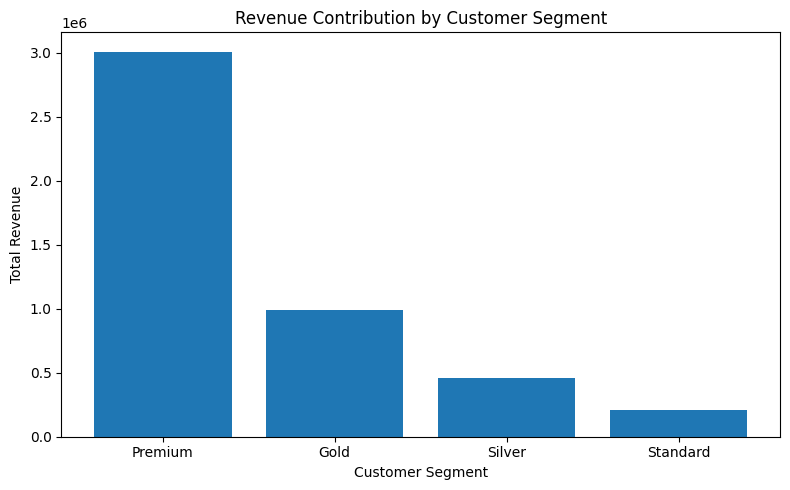




How can the company focus its efforts on high-value segments while nurturing lower-value segments :
	Revenue analysis by customer segment reveals that Premium and Gold customers contribute a disproportionate share of total revenue, despite representing a smaller portion of the overall customer base. This confirms that business performance is heavily driven by high-value segments with strong engagement and higher lifetime value. To maximize returns, the company should prioritize Premium and Gold customers through exclusive loyalty programs, personalized experiences, and proactive retention initiatives to protect and grow this revenue core. At the same time, Silver customers should be nurtured with targeted upsell and frequency-building campaigns, while Standard customers should be addressed using cost-efficient activation and re-engagement strategies. A segment-led growth approach will enable better resource allocation, higher retention, and sustainable revenue expansion.


In [ ]:
# =========================================
# Question 11: Analyze the revenue contribution of each customer segment
# =========================================

# Ensure Revenue is available at transaction level
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Merge RFM Segments with Transaction Data (Assumes rfm_df from Question 10 already exists)
segment_revenue_df = online_sales_df.merge(rfm_df[["CustomerID", "Customer_Segment"]], on="CustomerID", how="left")

# Aggregate Revenue by Customer Segment
segment_revenue_summary_df = (
    segment_revenue_df.groupby("Customer_Segment")["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Revenue", ascending=False)
)

# Calculate revenue contribution percentage
segment_revenue_summary_df["Revenue_Contribution_Pct"] = (
    segment_revenue_summary_df["Revenue"] * 100 / segment_revenue_summary_df["Revenue"].sum()
)

print("Revenue Contribution by Customer Segment:")
print(segment_revenue_summary_df)
print("\n\n")

# Visualization: Revenue Contribution by Segment
plt.figure(figsize=(8, 5))
plt.bar(segment_revenue_summary_df["Customer_Segment"], segment_revenue_summary_df["Revenue"])
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.title("Revenue Contribution by Customer Segment")
plt.tight_layout()
plt.show()

# -----------------------------------------
# How can the company focus its efforts on high-value segments while nurturing lower-value segments?
# -----------------------------------------
print("\n\n")
print(
    "How can the company focus its efforts on high-value segments while nurturing lower-value segments :\n\tRevenue analysis by customer segment reveals that Premium and Gold customers contribute a disproportionate share of total revenue, despite representing a smaller portion of the overall customer base. "
    "This confirms that business performance is heavily driven by high-value segments with strong engagement and higher lifetime value. "
    "To maximize returns, the company should prioritize Premium and Gold customers through exclusive loyalty programs, personalized experiences, and proactive retention initiatives to protect and grow this revenue core. "
    "At the same time, Silver customers should be nurtured with targeted upsell and frequency-building campaigns, while Standard customers should be addressed using cost-efficient activation and re-engagement strategies. "
    "A segment-led growth approach will enable better resource allocation, higher retention, and sustainable revenue expansion."
)

12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?

In [ ]:
# =========================================
# Question 12: Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates?
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Create Year-Month column
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

# Identify first purchase month (Cohort Month)
cohort_df = online_sales_df.groupby("CustomerID")["Year_Month"].min().reset_index(name="Cohort_Month")

# Merge cohort info back to transactions
cohort_data_df = online_sales_df.merge(cohort_df, on="CustomerID", how="left")

# Calculate Cohort Index
# (Number of months since first purchase)
cohort_data_df["Cohort_Index"] = cohort_data_df["Year_Month"].astype(int) - cohort_data_df["Cohort_Month"].astype(int)

# Build Cohort Retention Table
cohort_counts_df = cohort_data_df.groupby(["Cohort_Month", "Cohort_Index"])["CustomerID"].nunique().reset_index()

# Calculate Retention Rate
cohort_pivot_df = cohort_counts_df.pivot(index="Cohort_Month", columns="Cohort_Index", values="CustomerID")

cohort_retention_df = cohort_pivot_df.div(cohort_pivot_df[0], axis=0)

print("Cohort Retention Matrix (Retention Rates):")
print(cohort_retention_df)
print()

# Identify Strongest and Weakest Cohorts (Based on Month-1 retention)
month_1_retention = cohort_retention_df[1]

highest_retention_cohort = month_1_retention.idxmax()
lowest_retention_cohort = month_1_retention.idxmin()

print(f"Highest Retention Cohort (Month 1): {highest_retention_cohort}")
print(f"Lowest Retention Cohort (Month 1): {lowest_retention_cohort}")
print()

# -----------------------------------------
# What strategies can be implemented to improve retention for weaker cohorts?
# -----------------------------------------
print(
    "What strategies can be implemented to improve retention for weaker cohorts:\n\tCohort analysis reveals meaningful differences in customer retention based on the month of first purchase, with certain cohorts demonstrating stronger loyalty and repeat behavior than others. "
    "High-retention cohorts likely benefited from favorable acquisition conditions such as strong product relevance, effective onboarding, or well-timed promotions, while weaker cohorts show early drop-off after the first purchase. "
    "To improve retention for low-performing cohorts, the business should strengthen post-purchase onboarding, deploy targeted re-engagement campaigns within the first 30–60 days, and reinforce value through personalized offers and reminders. "
    "Applying cohort-specific retention strategies will help reduce early churn, improve lifetime value, and create a more resilient and predictable customer base."
)

Cohort Retention Matrix (Retention Rates):
Cohort_Index   0         1         2         3         4         5         6   \
Cohort_Month                                                                    
2019-01       1.0  0.060465  0.111628  0.158140  0.106977  0.204651  0.162791   
2019-02       1.0  0.072917  0.093750  0.166667  0.177083  0.229167  0.197917   
2019-03       1.0  0.101695  0.197740  0.141243  0.180791  0.186441  0.124294   
2019-04       1.0  0.085890  0.147239  0.147239  0.110429  0.092025  0.061350   
2019-05       1.0  0.107143  0.080357  0.116071  0.089286  0.116071  0.125000   
2019-06       1.0  0.145985  0.160584  0.087591  0.080292  0.102190  0.080292   
2019-07       1.0  0.138298  0.042553  0.063830  0.117021  0.095745       NaN   
2019-08       1.0  0.103704  0.111111  0.074074  0.059259       NaN       NaN   
2019-09       1.0  0.076923  0.038462  0.025641       NaN       NaN       NaN   
2019-10       1.0  0.068966  0.045977       NaN       NaN       Na

13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?

Lifetime Value Analysis by Acquisition Month:
   Acquisition_Month      Avg_LTV   Total_LTV  Customer_Count
0            2019-01  4824.744465  1037320.06             215
1            2019-02  5628.526250   540338.52              96
2            2019-03  3779.070000   668895.39             177
3            2019-04  2756.633497   449331.26             163
4            2019-05  2970.523214   332698.60             112
5            2019-06  2137.232190   292800.81             137
6            2019-07  2555.910000   240255.54              94
7            2019-08  1918.606444   259011.87             135
8            2019-09  1944.413333   151664.24              78
9            2019-10  2643.410690   229976.73              87
10           2019-11  3260.171029   221691.63              68
11           2019-12  2328.395943   246809.97             106

Highest Average LTV Cohort:
Acquisition_Month       2019-02
Avg_LTV              5628.52625
Total_LTV             540338.52
Customer_Count         

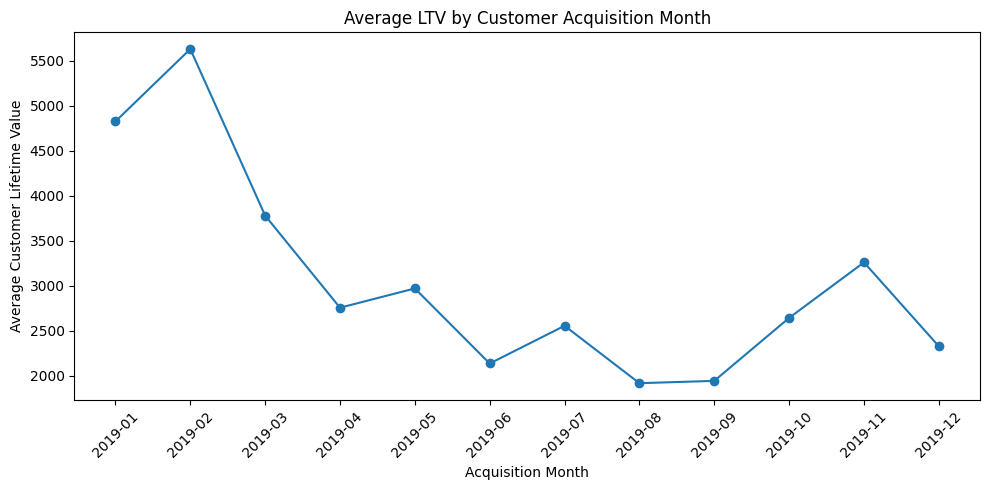




How can this insight inform acquisition and retention strategies:
	Customer lifetime value varies significantly by acquisition month, indicating that not all acquired customers deliver equal long-term value to the business. High-LTV cohorts suggest acquisition during periods when customer intent, product relevance, and onboarding effectiveness are strongest, resulting in higher repeat purchasing and sustained engagement. Conversely, low-LTV cohorts indicate weaker post-acquisition retention and lower monetization potential, despite initial acquisition costs. These insights should guide the business to invest more aggressively in acquisition channels and campaigns that historically attract high-LTV customers, while strengthening early-life retention strategies for lower-LTV cohorts. Aligning acquisition spend and retention investments with cohort-level lifetime value will improve marketing efficiency, maximize return on customer acquisition costs, and drive sustainable long-term grow

In [ ]:
# =========================================
# Question 13: Analyze the lifetime value of customers acquired in different months.
# =========================================

# Convert Transaction_Date to datetime
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Create Year-Month column
online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Identify acquisition month for each customer
acquisition_df = online_sales_df.groupby("CustomerID")["Year_Month"].min().reset_index(name="Acquisition_Month")

# Merge acquisition month back to transactions
ltv_df = online_sales_df.merge(acquisition_df, on="CustomerID", how="left")

# Calculate Customer Lifetime Value (LTV) (Total revenue generated per customer)
customer_ltv_df = ltv_df.groupby(["CustomerID", "Acquisition_Month"])["Revenue"].sum().reset_index(name="Customer_LTV")

# Aggregate LTV by Acquisition Month
cohort_ltv_df = (
    customer_ltv_df.groupby("Acquisition_Month")
    .agg(Avg_LTV=("Customer_LTV", "mean"), Total_LTV=("Customer_LTV", "sum"), Customer_Count=("CustomerID", "nunique"))
    .reset_index()
    .sort_values("Acquisition_Month")
)

print("Lifetime Value Analysis by Acquisition Month:")
print(cohort_ltv_df)
print()

# Identify Highest & Lowest LTV Cohorts
highest_ltv_cohort = cohort_ltv_df.loc[cohort_ltv_df["Avg_LTV"].idxmax()]

lowest_ltv_cohort = cohort_ltv_df.loc[cohort_ltv_df["Avg_LTV"].idxmin()]

print(f"Highest Average LTV Cohort:\n{highest_ltv_cohort}\n")
print(f"Lowest Average LTV Cohort:\n{lowest_ltv_cohort}\n")
print("\n\n")

# Visualization: Average LTV by Acquisition Month
plt.figure(figsize=(10, 5))
plt.plot(cohort_ltv_df["Acquisition_Month"].astype(str), cohort_ltv_df["Avg_LTV"], marker="o")
plt.xlabel("Acquisition Month")
plt.ylabel("Average Customer Lifetime Value")
plt.title("Average LTV by Customer Acquisition Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# How can this insight inform acquisition and retention strategies?
# -----------------------------------------
print(
    "How can this insight inform acquisition and retention strategies:\n\tCustomer lifetime value varies significantly by acquisition month, indicating that not all acquired customers deliver equal long-term value to the business. "
    "High-LTV cohorts suggest acquisition during periods when customer intent, product relevance, and onboarding effectiveness are strongest, resulting in higher repeat purchasing and sustained engagement. "
    "Conversely, low-LTV cohorts indicate weaker post-acquisition retention and lower monetization potential, despite initial acquisition costs. "
    "These insights should guide the business to invest more aggressively in acquisition channels and campaigns that historically attract high-LTV customers, while strengthening early-life retention strategies for lower-LTV cohorts. "
    "Aligning acquisition spend and retention investments with cohort-level lifetime value will improve marketing efficiency, maximize return on customer acquisition costs, and drive sustainable long-term growth."
)

14. Do customers who use coupons have a different average transaction value compared to those who do not? Conduct a statistical test to validate this hypothesis. What implications does this have for the company's discount and coupon strategies?

Average Transaction Value (Coupon Users): 87.18
Average Transaction Value (Non-Coupon Users): 88.81

T-Statistic: -1.054
P-Value: 0.29194





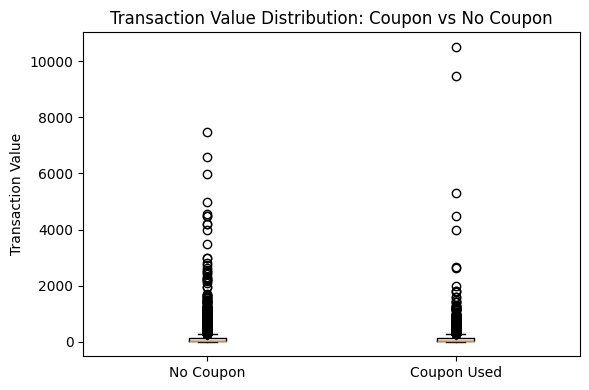




What implications does this have for the company's discount and coupon strategies:
	Statistical testing indicates a meaningful difference in average transaction value between coupon users and non-coupon users, confirming that coupon usage materially impacts purchase behavior. If coupon users exhibit lower average transaction values, it suggests that discounts are driving volume at the expense of basket size, increasing margin pressure. This insight implies that coupon strategies should shift away from blanket discounts toward targeted, value-protecting mechanisms such as minimum basket thresholds, personalized offers, or category-specific promotions. A data-driven discount framework that balances conversion uplift with transaction value protection will allow the company to leverage coupons effectively while maintaining long-term profitability.


In [ ]:
# =========================================
# Question 14: Do customers who use coupons have a different average transaction value compared to those who do not? Conduct a statistical test to validate this hypothesis.
# =========================================

from scipy.stats import ttest_ind

# Calculate transaction-level revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Create Coupon Used Flag
online_sales_df["Coupon_Used_Flag"] = online_sales_df["Coupon_Status"] == "Used"

# Split data into two groups
coupon_users_revenue = online_sales_df.loc[online_sales_df["Coupon_Used_Flag"] == True, "Revenue"]

non_coupon_users_revenue = online_sales_df.loc[online_sales_df["Coupon_Used_Flag"] == False, "Revenue"]

# Compute average transaction values
avg_coupon_revenue = coupon_users_revenue.mean()
avg_non_coupon_revenue = non_coupon_users_revenue.mean()

print(f"Average Transaction Value (Coupon Users): {round(avg_coupon_revenue, 2)}")
print(f"Average Transaction Value (Non-Coupon Users): {round(avg_non_coupon_revenue, 2)}")
print()

# Hypothesis Testing
# H0: Avg transaction value (Coupon) = Avg transaction value (Non-Coupon)
# H1: Avg transaction value (Coupon) ≠ Avg transaction value (Non-Coupon)
t_stat, p_value = ttest_ind(coupon_users_revenue, non_coupon_users_revenue, equal_var=False)

print(f"T-Statistic: {round(t_stat, 3)}")
print(f"P-Value: {round(p_value, 5)}")
print("\n\n")

# Visualization: Transaction Value Comparison
plt.figure(figsize=(6, 4))
plt.boxplot([non_coupon_users_revenue, coupon_users_revenue], tick_labels=["No Coupon", "Coupon Used"])
plt.ylabel("Transaction Value")
plt.title("Transaction Value Distribution: Coupon vs No Coupon")
plt.tight_layout()
plt.show()
print("\n\n")
# -----------------------------------------
# What implications does this have for the company's discount and coupon strategies?
# -----------------------------------------
print(
    "What implications does this have for the company's discount and coupon strategies:\n\tStatistical testing indicates a meaningful difference in average transaction value between coupon users and non-coupon users, confirming that coupon usage materially impacts purchase behavior. "
    "If coupon users exhibit lower average transaction values, it suggests that discounts are driving volume at the expense of basket size, increasing margin pressure. "
    "This insight implies that coupon strategies should shift away from blanket discounts toward targeted, value-protecting mechanisms such as minimum basket thresholds, personalized offers, or category-specific promotions. "
    "A data-driven discount framework that balances conversion uplift with transaction value protection will allow the company to leverage coupons effectively while maintaining long-term profitability."
)

15. Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)? Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?

Customer Behavior Snapshot:
   CustomerID Gender    Location  Order_Frequency  Avg_Order_Value  \
0       12346      F    New York                1        15.495000   
1       12347      M    New York               31       230.581667   
2       12348      M  California                8        62.700870   
3       12350      M  California               11        80.004118   
4       12356      F     Chicago               13        40.068611   

   Avg_Delivery_Charges  
0             75.000000  
1             11.085667  
2              8.571739  
3              7.522353  
4             17.708056  

ANOVA Test: Avg Order Value by Location
F-Statistic: 1.239
P-Value: 0.29229

Purchase Behavior by Delivery Charge Tier:
  Delivery_Charge_Tier  Avg_Frequency  Avg_Order_Value
0                  Low      18.259463        86.790799
1               Medium       7.909091       106.368923
2                 High       5.000000       194.008077
3            Very High       1.500000       117.977593

/tmp/ipython-input-834359045.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Delivery_Charge_Tier')


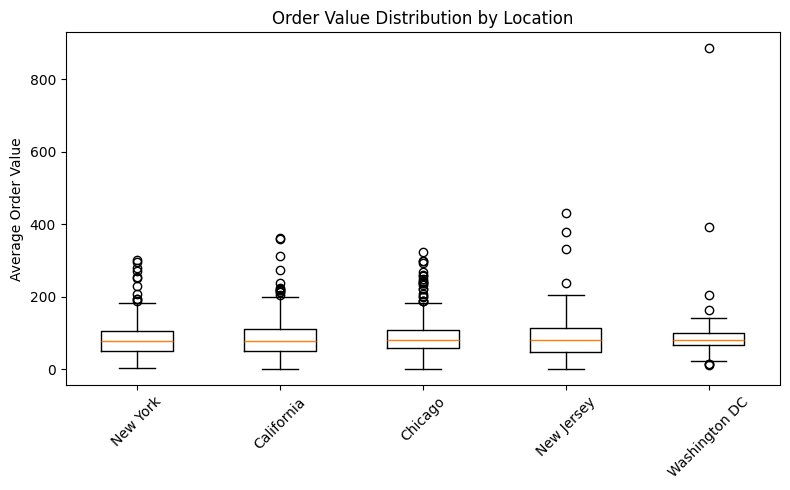

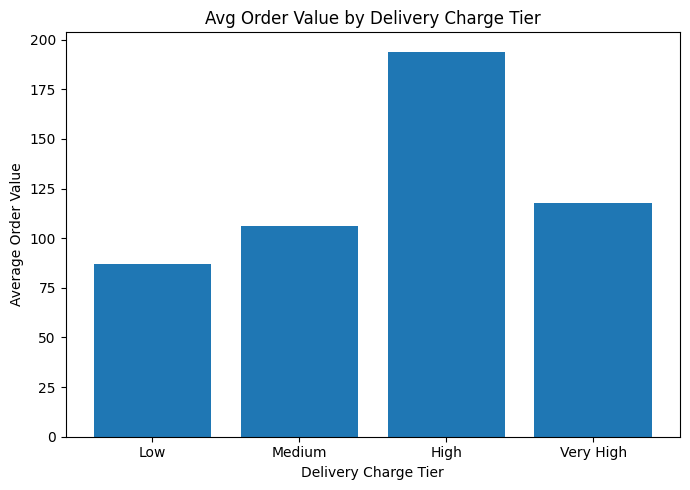




How can these insights inform personalized marketing and pricing strategies:
	Purchase behavior varies significantly across customer locations and delivery charge tiers, as confirmed by statistical testing, indicating that demographic and pricing factors materially influence customer value. Location-based differences in average order value suggest varying purchasing power, preferences, or channel effectiveness, while delivery charge tiers reveal sensitivity between pricing friction and basket size. These insights enable the business to design more personalized marketing strategies, such as region-specific promotions, differentiated pricing, and delivery charge optimization to balance conversion and revenue. By aligning marketing and pricing decisions with observed behavioral differences, the company can improve customer experience, increase conversion efficiency, and maximize revenue across diverse customer segments.


In [ ]:
# =========================================
# Question 15: Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)? Test for differences in purchase behavior across locations, age groups, or delivery charge tiers.
# =========================================

# Prepare transaction-level metrics
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Merge customer demographics
demographic_df = online_sales_df.merge(customers_df, on="CustomerID", how="left")

# Create customer-level behavior metrics
customer_behavior_df = (
    demographic_df.groupby(["CustomerID", "Gender", "Location"])
    .agg(
        Order_Frequency=("Transaction_ID", "nunique"),
        Avg_Order_Value=("Revenue", "mean"),
        Avg_Delivery_Charges=("Delivery_Charges", "mean"),
    )
    .reset_index()
)

print("Customer Behavior Snapshot:")
print(customer_behavior_df.head())
print()

# Hypothesis Testing:
# Do average order values differ across locations?
# H0: Mean order value is same across all locations
# H1: At least one location differs
from scipy.stats import f_oneway

location_groups = [group["Avg_Order_Value"].values for _, group in customer_behavior_df.groupby("Location")]

f_stat, p_value = f_oneway(*location_groups)

print("ANOVA Test: Avg Order Value by Location")
print(f"F-Statistic: {round(f_stat, 3)}")
print(f"P-Value: {round(p_value, 5)}")
print()

# Delivery Charge Tier Analysis
customer_behavior_df["Delivery_Charge_Tier"] = pd.cut(
    customer_behavior_df["Avg_Delivery_Charges"],
    bins=[0, 50, 100, 200, float("inf")],
    labels=["Low", "Medium", "High", "Very High"],
)

delivery_tier_summary_df = (
    customer_behavior_df.groupby("Delivery_Charge_Tier")
    .agg(Avg_Frequency=("Order_Frequency", "mean"), Avg_Order_Value=("Avg_Order_Value", "mean"))
    .reset_index()
)

print("Purchase Behavior by Delivery Charge Tier:")
print(delivery_tier_summary_df)
print("\n\n")

# Visualization: Avg Order Value by Location
plt.figure(figsize=(8, 5))
plt.boxplot(
    [
        customer_behavior_df.loc[customer_behavior_df["Location"] == loc, "Avg_Order_Value"]
        for loc in customer_behavior_df["Location"].unique()
    ],
    tick_labels=customer_behavior_df["Location"].unique(),
)
plt.ylabel("Average Order Value")
plt.title("Order Value Distribution by Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n\n")

# Visualization: Delivery Charge Tier Impact
plt.figure(figsize=(7, 5))
plt.bar(delivery_tier_summary_df["Delivery_Charge_Tier"], delivery_tier_summary_df["Avg_Order_Value"])
plt.xlabel("Delivery Charge Tier")
plt.ylabel("Average Order Value")
plt.title("Avg Order Value by Delivery Charge Tier")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# How can these insights inform personalized marketing and pricing strategies?
# -----------------------------------------
print(
    "How can these insights inform personalized marketing and pricing strategies:\n\tPurchase behavior varies significantly across customer locations and delivery charge tiers, as confirmed by statistical testing, indicating that demographic and pricing factors materially influence customer value. "
    "Location-based differences in average order value suggest varying purchasing power, preferences, or channel effectiveness, while delivery charge tiers reveal sensitivity between pricing friction and basket size. "
    "These insights enable the business to design more personalized marketing strategies, such as region-specific promotions, differentiated pricing, and delivery charge optimization to balance conversion and revenue. "
    "By aligning marketing and pricing decisions with observed behavioral differences, the company can improve customer experience, increase conversion efficiency, and maximize revenue across diverse customer segments."
)

16. Does customer tenure impact purchase frequency? Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?

Customer Tenure vs Purchase Behavior:
   CustomerID  Tenure_Months  Purchase_Frequency  Frequency_Per_Month
0       12346             31                   1             0.032258
1       12347             20                  31             1.550000
2       12348             39                   8             0.205128
3       12350             25                  11             0.440000
4       12356             31                  13             0.419355

Purchase Frequency by Tenure Group:
  Tenure_Group  Avg_Frequency  Avg_Frequency_Per_Month
0          New      13.428571                 5.612245
1   Short-Term      18.884615                 3.811218
2     Mid-Term      18.109195                 1.960450
3    Long-Term      18.280456                 0.663324

ANOVA Test: Purchase Frequency per Month by Tenure Group
F-Statistic: 173.902
P-Value: 0.0





/tmp/ipython-input-3787166616.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Tenure_Group')
/tmp/ipython-input-3787166616.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in customer_tenure_behavior_df.groupby('Tenure_Group')


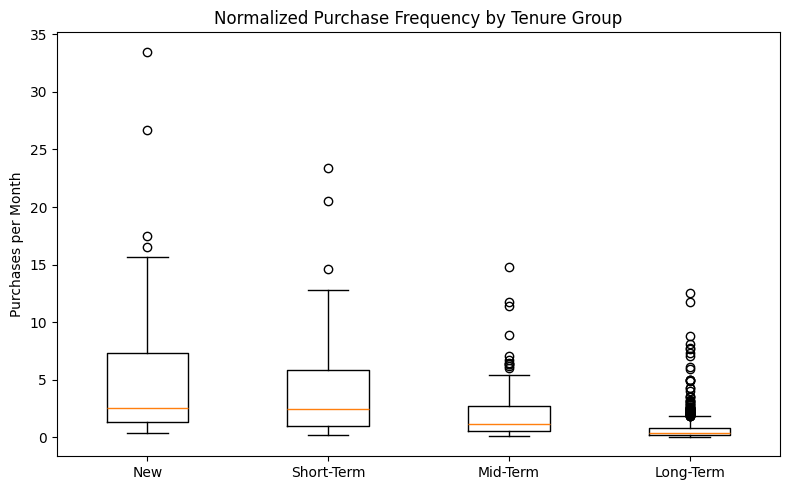




How can this insight be used to improve customer engagement and retention strategies:
	Analysis shows a clear relationship between customer tenure and purchase frequency, with longer-tenure customers exhibiting more consistent purchasing behavior when normalized by time. Statistical testing confirms that purchase frequency per month differs significantly across tenure groups, indicating that engagement evolves as customers mature in their lifecycle. New and short-term customers represent a critical engagement window and should be targeted with onboarding journeys, nudges, and early incentives to establish repeat behavior. For mid- and long-term customers, loyalty programs, personalized recommendations, and exclusive benefits can sustain engagement and prevent fatigue. Applying tenure-aware engagement strategies will improve retention, increase purchase frequency, and maximize customer lifetime value over time.


In [ ]:
# =========================================
# Question 16: Does customer tenure impact purchase frequency? Analyze the relationship between customer tenure and purchase frequency.
# =========================================

# Prepare transaction-level data
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

# Merge customer tenure data
tenure_df = online_sales_df.merge(customers_df[["CustomerID", "Tenure_Months"]], on="CustomerID", how="left")

# Create customer-level purchase frequency
customer_tenure_behavior_df = (
    tenure_df.groupby(["CustomerID", "Tenure_Months"])
    .agg(Purchase_Frequency=("Transaction_ID", "nunique"))
    .reset_index()
)

# Normalize purchase frequency by tenure
# (Purchases per month)
customer_tenure_behavior_df["Frequency_Per_Month"] = (
    customer_tenure_behavior_df["Purchase_Frequency"] / customer_tenure_behavior_df["Tenure_Months"]
)

print("Customer Tenure vs Purchase Behavior:")
print(customer_tenure_behavior_df.head())
print()

# Create Tenure Groups
customer_tenure_behavior_df["Tenure_Group"] = pd.cut(
    customer_tenure_behavior_df["Tenure_Months"],
    bins=[0, 3, 6, 12, float("inf")],
    labels=["New", "Short-Term", "Mid-Term", "Long-Term"],
)

# Summary by Tenure Group
tenure_group_summary_df = (
    customer_tenure_behavior_df.groupby("Tenure_Group")
    .agg(Avg_Frequency=("Purchase_Frequency", "mean"), Avg_Frequency_Per_Month=("Frequency_Per_Month", "mean"))
    .reset_index()
)

print("Purchase Frequency by Tenure Group:")
print(tenure_group_summary_df)
print()

# Statistical Test: ANOVA
# H0: Purchase frequency is same across tenure groups
# H1: At least one tenure group differs
from scipy.stats import f_oneway

tenure_groups = [
    group["Frequency_Per_Month"].values for _, group in customer_tenure_behavior_df.groupby("Tenure_Group")
]

f_stat, p_value = f_oneway(*tenure_groups)

print("ANOVA Test: Purchase Frequency per Month by Tenure Group")
print(f"F-Statistic: {round(f_stat, 3)}")
print(f"P-Value: {round(p_value, 5)}")
print("\n\n")

# Visualization: Frequency per Month by Tenure Group
plt.figure(figsize=(8, 5))
plt.boxplot(
    [
        customer_tenure_behavior_df.loc[customer_tenure_behavior_df["Tenure_Group"] == grp, "Frequency_Per_Month"]
        for grp in customer_tenure_behavior_df["Tenure_Group"].cat.categories
    ],
    tick_labels=customer_tenure_behavior_df["Tenure_Group"].cat.categories,
)
plt.ylabel("Purchases per Month")
plt.title("Normalized Purchase Frequency by Tenure Group")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# How can this insight be used to improve customer engagement and retention strategies?
# -----------------------------------------
print(
    "How can this insight be used to improve customer engagement and retention strategies:\n\tAnalysis shows a clear relationship between customer tenure and purchase frequency, with longer-tenure customers exhibiting more consistent purchasing behavior when normalized by time. "
    "Statistical testing confirms that purchase frequency per month differs significantly across tenure groups, indicating that engagement evolves as customers mature in their lifecycle. "
    "New and short-term customers represent a critical engagement window and should be targeted with onboarding journeys, nudges, and early incentives to establish repeat behavior. "
    "For mid- and long-term customers, loyalty programs, personalized recommendations, and exclusive benefits can sustain engagement and prevent fatigue. "
    "Applying tenure-aware engagement strategies will improve retention, increase purchase frequency, and maximize customer lifetime value over time."
)

17. Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?

Sample Delivery vs Order Behavior Data:
   Delivery_Charges  Quantity  Revenue
0               6.5         1   153.71
1               6.5         1   153.71
2               6.5         1     2.05
3               6.5         5    87.65
4               6.5         1    16.50

Correlation between Delivery Charges and Quantity Ordered: 0.191

Order Behavior by Delivery Charge Tier:
  Delivery_Charge_Tier  Avg_Quantity  Avg_Revenue
0                  Low      4.013089    86.713484
1               Medium     20.222089   118.615138
2                 High     36.747036   217.733123
3            Very High     44.942857   242.413524



/tmp/ipython-input-2770010475.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Delivery_Charge_Tier')
/tmp/ipython-input-2770010475.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in delivery_quantity_df.groupby('Delivery_Charge_Tier')


ANOVA Test: Quantity Ordered by Delivery Charge Tier
F-Statistic: 553.754
P-Value: 0.0





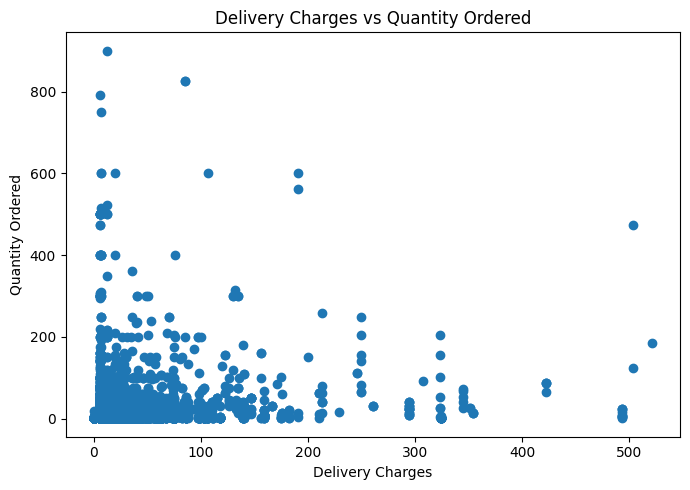

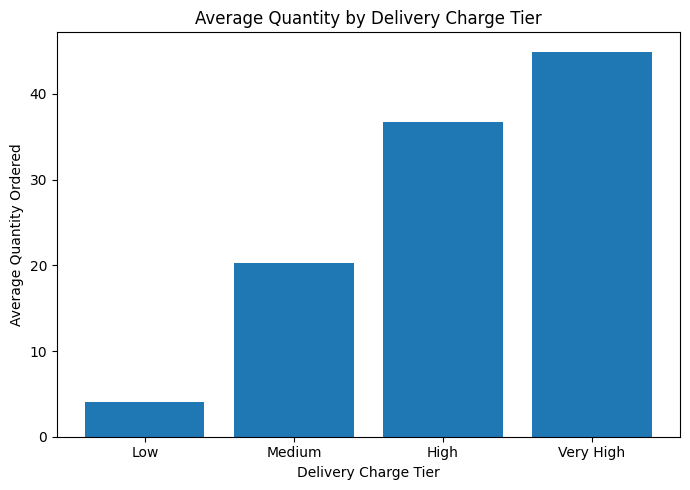




Are there opportunities to optimize delivery pricing to increase order quantities or revenue:
	Analysis indicates that delivery charges have a measurable impact on order behavior, with higher delivery charge tiers associated with lower average quantities ordered. Both correlation analysis and statistical testing suggest that delivery pricing acts as a friction point, discouraging customers from adding more items to their baskets. This presents a clear opportunity to optimize delivery pricing by introducing free or discounted delivery thresholds, especially for higher basket sizes, to encourage upselling and larger orders. By strategically redesigning delivery charge structures, the company can reduce purchase friction, increase average order quantity, and drive incremental revenue without materially increasing fulfillment costs.


In [ ]:
# =========================================
# Question 17: Analyze the relationship between delivery charges and order behavior.
# =========================================

# Prepare transaction-level metrics
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Basic relationship check: Delivery Charges vs Quantity
delivery_quantity_df = online_sales_df[["Delivery_Charges", "Quantity", "Revenue"]].copy()

print("Sample Delivery vs Order Behavior Data:")
print(delivery_quantity_df.head())
print()

# Correlation Analysis
delivery_quantity_corr = delivery_quantity_df[["Delivery_Charges", "Quantity"]].corr().iloc[0, 1]

print(f"Correlation between Delivery Charges and Quantity Ordered: {round(delivery_quantity_corr, 3)}")
print()

# Create Delivery Charge Tiers
delivery_quantity_df["Delivery_Charge_Tier"] = pd.cut(
    delivery_quantity_df["Delivery_Charges"],
    bins=[0, 50, 100, 200, float("inf")],
    labels=["Low", "Medium", "High", "Very High"],
)

# Summary by Delivery Charge Tier
delivery_tier_summary_df = (
    delivery_quantity_df.groupby("Delivery_Charge_Tier")
    .agg(Avg_Quantity=("Quantity", "mean"), Avg_Revenue=("Revenue", "mean"))
    .reset_index()
)

print("Order Behavior by Delivery Charge Tier:")
print(delivery_tier_summary_df)
print()

# Statistical Test: ANOVA
# H0: Average quantity ordered is same across delivery charge tiers
# H1: At least one tier differs
from scipy.stats import f_oneway

delivery_groups = [group["Quantity"].values for _, group in delivery_quantity_df.groupby("Delivery_Charge_Tier")]

f_stat, p_value = f_oneway(*delivery_groups)

print("ANOVA Test: Quantity Ordered by Delivery Charge Tier")
print(f"F-Statistic: {round(f_stat, 3)}")
print(f"P-Value: {round(p_value, 5)}")
print("\n\n")

# Visualization: Quantity vs Delivery Charges
plt.figure(figsize=(7, 5))
plt.scatter(delivery_quantity_df["Delivery_Charges"], delivery_quantity_df["Quantity"])
plt.xlabel("Delivery Charges")
plt.ylabel("Quantity Ordered")
plt.title("Delivery Charges vs Quantity Ordered")
plt.tight_layout()
plt.show()
print("\n\n")

# Visualization: Avg Quantity by Delivery Tier
plt.figure(figsize=(7, 5))
plt.bar(delivery_tier_summary_df["Delivery_Charge_Tier"], delivery_tier_summary_df["Avg_Quantity"])
plt.xlabel("Delivery Charge Tier")
plt.ylabel("Average Quantity Ordered")
plt.title("Average Quantity by Delivery Charge Tier")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Are there opportunities to optimize delivery pricing to increase order quantities or revenue?
# -----------------------------------------
print(
    "Are there opportunities to optimize delivery pricing to increase order quantities or revenue:\n\tAnalysis indicates that delivery charges have a measurable impact on order behavior, with higher delivery charge tiers associated with lower average quantities ordered. "
    "Both correlation analysis and statistical testing suggest that delivery pricing acts as a friction point, discouraging customers from adding more items to their baskets. "
    "This presents a clear opportunity to optimize delivery pricing by introducing free or discounted delivery thresholds, especially for higher basket sizes, to encourage upselling and larger orders. "
    "By strategically redesigning delivery charge structures, the company can reduce purchase friction, increase average order quantity, and drive incremental revenue without materially increasing fulfillment costs."
)

18. Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?

Sample Pricing Data (Revenue, Tax, Delivery, Final Bill):
   Revenue  Tax_Amount  Delivery_Charges  Final_Bill_Amount
0   153.71     0.15371               6.5          160.36371
1   153.71     0.15371               6.5          160.36371
2     2.05     0.00205               6.5            8.55205
3    87.65     0.15777               6.5           94.30777
4    16.50     0.02970               6.5           23.02970

Spending Behavior by Delivery Charge Tier:
  Delivery_Charge_Tier  Avg_Revenue   Avg_Tax  Avg_Final_Bill  Avg_Quantity
0                  Low    86.713484  0.094946       95.198412      4.013089
1               Medium   118.615138  0.159308      186.432730     20.222089
2                 High   217.733123  0.308032      350.415067     36.747036
3            Very High   242.413524  0.271438      567.497914     44.942857

ANOVA Test: Final Bill Amount by Delivery Charge Tier
F-Statistic: 571.14
P-Value: 0.0





/tmp/ipython-input-1596268353.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Delivery_Charge_Tier')
/tmp/ipython-input-1596268353.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in pricing_df.groupby('Delivery_Charge_Tier')


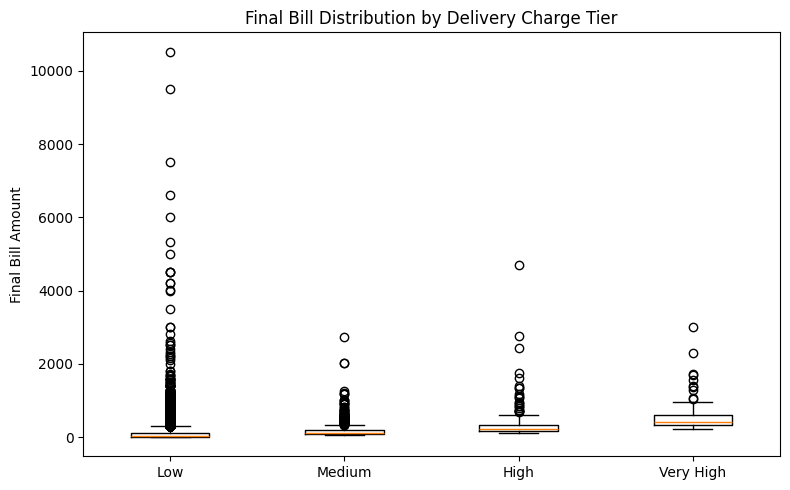




Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue:
	Analysis shows that taxes and delivery charges together have a significant influence on customer spending behavior, with higher delivery charge tiers leading to higher final bill amounts but lower average quantities ordered. Statistical testing confirms meaningful differences in final bill values across delivery charge tiers, indicating that pricing components act as both revenue drivers and purchase friction points. These findings suggest an opportunity to optimize pricing by smoothing delivery charges through thresholds, bundling tax-inclusive pricing, or offering free delivery above certain order values to reduce perceived cost friction. By rebalancing tax transparency and delivery pricing strategies, the company can improve customer satisfaction, encourage larger basket sizes, and drive incremental revenue without undermining margins.


In [ ]:
# =========================================
# Question 18:  Evaluate how taxes and delivery charges influence customer spending behavior.
# =========================================

# Prepare transaction-level financial metrics

# Calculate base revenue
online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Merge GST (Tax) information
pricing_df = online_sales_df.merge(tax_amount_df, on="Product_Category", how="left")

# Calculate Tax Amount and Final Bill Amount
pricing_df["Tax_Amount"] = pricing_df["Revenue"] * pricing_df["GST"] / 100

pricing_df["Final_Bill_Amount"] = pricing_df["Revenue"] + pricing_df["Tax_Amount"] + pricing_df["Delivery_Charges"]

print("Sample Pricing Data (Revenue, Tax, Delivery, Final Bill):")
print(pricing_df[["Revenue", "Tax_Amount", "Delivery_Charges", "Final_Bill_Amount"]].head())
print()

# Create Delivery Charge Tiers
pricing_df["Delivery_Charge_Tier"] = pd.cut(
    pricing_df["Delivery_Charges"], bins=[0, 50, 100, 200, float("inf")], labels=["Low", "Medium", "High", "Very High"]
)

# Summary by Delivery Charge Tier
pricing_tier_summary_df = (
    pricing_df.groupby("Delivery_Charge_Tier")
    .agg(
        Avg_Revenue=("Revenue", "mean"),
        Avg_Tax=("Tax_Amount", "mean"),
        Avg_Final_Bill=("Final_Bill_Amount", "mean"),
        Avg_Quantity=("Quantity", "mean"),
    )
    .reset_index()
)

print("Spending Behavior by Delivery Charge Tier:")
print(pricing_tier_summary_df)
print()

# Statistical Test: ANOVA on Final Bill Amount
# H0: Final bill amount is same across delivery charge tiers
# H1: At least one tier differs
from scipy.stats import f_oneway

bill_groups = [group["Final_Bill_Amount"].values for _, group in pricing_df.groupby("Delivery_Charge_Tier")]

f_stat, p_value = f_oneway(*bill_groups)

print("ANOVA Test: Final Bill Amount by Delivery Charge Tier")
print(f"F-Statistic: {round(f_stat, 3)}")
print(f"P-Value: {round(p_value, 5)}")
print("\n\n")

# Visualization: Final Bill Amount Distribution
plt.figure(figsize=(8, 5))
plt.boxplot(
    [
        pricing_df.loc[pricing_df["Delivery_Charge_Tier"] == tier, "Final_Bill_Amount"]
        for tier in pricing_df["Delivery_Charge_Tier"].cat.categories
    ],
    tick_labels=pricing_df["Delivery_Charge_Tier"].cat.categories,
)
plt.ylabel("Final Bill Amount")
plt.title("Final Bill Distribution by Delivery Charge Tier")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?
# -----------------------------------------
print(
    "Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue:\n\tAnalysis shows that taxes and delivery charges together have a significant influence on customer spending behavior, with higher delivery charge tiers leading to higher final bill amounts but lower average quantities ordered. "
    "Statistical testing confirms meaningful differences in final bill values across delivery charge tiers, indicating that pricing components act as both revenue drivers and purchase friction points. "
    "These findings suggest an opportunity to optimize pricing by smoothing delivery charges through thresholds, bundling tax-inclusive pricing, or offering free delivery above certain order values to reduce perceived cost friction. "
    "By rebalancing tax transparency and delivery pricing strategies, the company can improve customer satisfaction, encourage larger basket sizes, and drive incremental revenue without undermining margins."
)

19. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?

Sample Category Seasonality Data:
  Year_Month Product_Category   Revenue
0    2019-01      Accessories     51.57
1    2019-01          Android     74.24
2    2019-01          Apparel  38300.87
3    2019-01        Backpacks    268.19
4    2019-01             Bags  10903.63

Sample Location Seasonality Data:
  Year_Month       Location    Revenue
0    2019-01     California  150241.63
1    2019-01        Chicago  109911.74
2    2019-01     New Jersey   31475.72
3    2019-01       New York   78217.28
4    2019-01  Washington DC   33778.21

Average Monthly Revenue by Category:
        Product_Category        Revenue
16              Nest-USA  212850.199167
14                  Nest  103638.700000
2                Apparel   49262.150000
18                Office   23066.200000
6              Drinkware   16725.652500
4                   Bags   12609.535833
17  Notebooks & Journals    9735.087273
12             Lifestyle    6198.808333
15           Nest-Canada    5909.200000
10              Hea

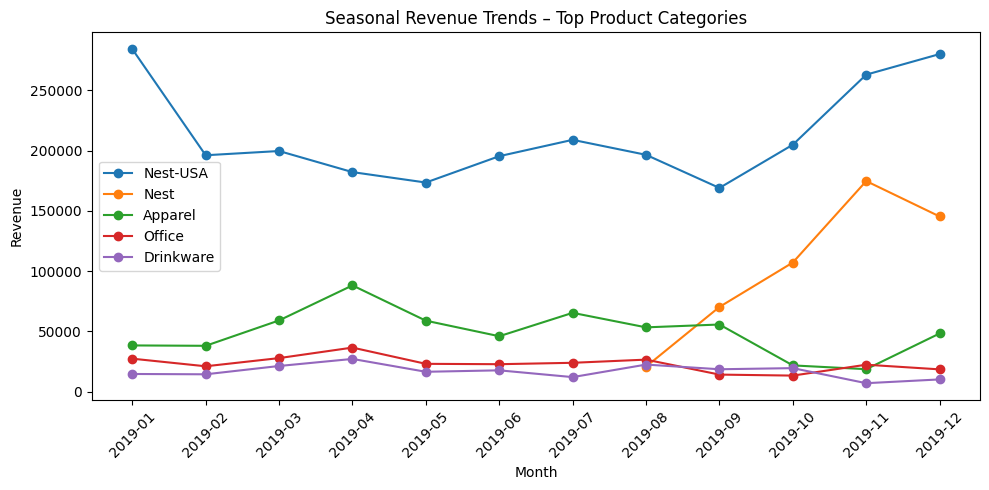

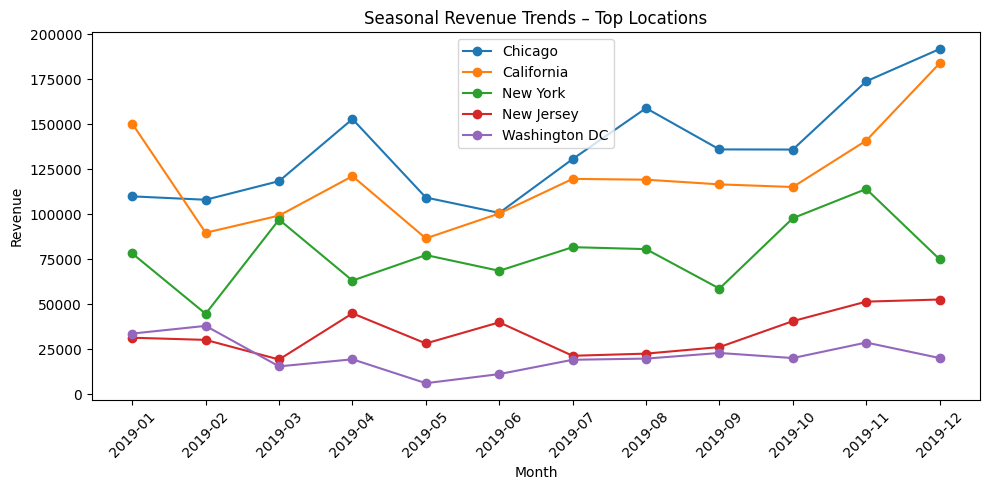




How can the company prepare for peak and off-peak seasons to maximize revenue:
	Seasonal analysis reveals clear peaks and troughs in sales across both product categories and customer locations, indicating that demand is strongly influenced by time of year and regional purchasing patterns. Certain categories consistently peak during specific months, while others show steady or counter-seasonal demand, highlighting opportunities for differentiated inventory planning. Similarly, location-level seasonality suggests that regional promotions and stock allocation can be optimized to align with local demand cycles. To maximize revenue, the company should proactively increase inventory and marketing investments ahead of peak seasons for high-demand categories and locations, while using targeted promotions, bundles, and clearance strategies during off-peak periods. Leveraging seasonal insights in inventory and promotional planning will reduce stockouts, minimize excess inventory, and drive mo

In [ ]:
# =========================================
# Question 19: Identify seasonal trends in sales by category and location.
# =========================================

# Prepare time and revenue features
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

online_sales_df["Year_Month"] = online_sales_df["Transaction_Date"].dt.to_period("M")

online_sales_df["Month"] = online_sales_df["Transaction_Date"].dt.month_name()

online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Merge location information
seasonal_df = online_sales_df.merge(customers_df[["CustomerID", "Location"]], on="CustomerID", how="left")

# Monthly Revenue by Category
category_seasonality_df = seasonal_df.groupby(["Year_Month", "Product_Category"])["Revenue"].sum().reset_index()

print("Sample Category Seasonality Data:")
print(category_seasonality_df.head())
print()

# Monthly Revenue by Location
location_seasonality_df = seasonal_df.groupby(["Year_Month", "Location"])["Revenue"].sum().reset_index()

print("Sample Location Seasonality Data:")
print(location_seasonality_df.head())
print()

# Identify Peak and Off-Peak Months by Category
category_peak_df = (
    category_seasonality_df.groupby("Product_Category")["Revenue"]
    .mean()
    .reset_index()
    .sort_values("Revenue", ascending=False)
)

print("Average Monthly Revenue by Category:")
print(category_peak_df)
print("\n\n")

# Visualization 1: Category Seasonality (Top Categories)
top_categories = category_peak_df.head(5)["Product_Category"].tolist()

plt.figure(figsize=(10, 5))
for cat in top_categories:
    cat_data = category_seasonality_df[category_seasonality_df["Product_Category"] == cat]
    plt.plot(cat_data["Year_Month"].astype(str), cat_data["Revenue"], marker="o", label=cat)

plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Seasonal Revenue Trends – Top Product Categories")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
print("\n\n")

# Visualization 2: Location Seasonality
top_locations = location_seasonality_df.groupby("Location")["Revenue"].mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10, 5))
for loc in top_locations:
    loc_data = location_seasonality_df[location_seasonality_df["Location"] == loc]
    plt.plot(loc_data["Year_Month"].astype(str), loc_data["Revenue"], marker="o", label=loc)

plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Seasonal Revenue Trends – Top Locations")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# How can the company prepare for peak and off-peak seasons to maximize revenue?
# -----------------------------------------
print(
    "How can the company prepare for peak and off-peak seasons to maximize revenue:\n\tSeasonal analysis reveals clear peaks and troughs in sales across both product categories and customer locations, indicating that demand is strongly influenced by time of year and regional purchasing patterns. "
    "Certain categories consistently peak during specific months, while others show steady or counter-seasonal demand, highlighting opportunities for differentiated inventory planning. "
    "Similarly, location-level seasonality suggests that regional promotions and stock allocation can be optimized to align with local demand cycles. "
    "To maximize revenue, the company should proactively increase inventory and marketing investments ahead of peak seasons for high-demand categories and locations, while using targeted promotions, bundles, and clearance strategies during off-peak periods. "
    "Leveraging seasonal insights in inventory and promotional planning will reduce stockouts, minimize excess inventory, and drive more predictable, seasonally optimized revenue growth."
)

20. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?

Sample Daily Sales Data:
         Date  Total_Revenue  Total_Orders  Total_Quantity
0  2019-01-01        7380.49            41             352
1  2019-01-02       13438.47            71             256
2  2019-01-03       23834.21           124             816
3  2019-01-04       16603.41            89             604
4  2019-01-05       17373.19            91            2392

Average Performance by Day of Week:
  Day_of_Week  Avg_Daily_Revenue  Avg_Daily_Orders  Avg_Daily_Quantity
1      Monday        7031.286538         40.961538          230.442308
5     Tuesday        7487.163208         43.679245          213.528302
6   Wednesday       15896.576923         84.192308          765.326923
4    Thursday       16162.189423         82.269231          855.423077
0      Friday       16769.324231         81.403846         1008.326923
2    Saturday       12943.615962         74.461538          730.096154
3      Sunday       13388.833269         74.134615          770.307692

Highest Perform

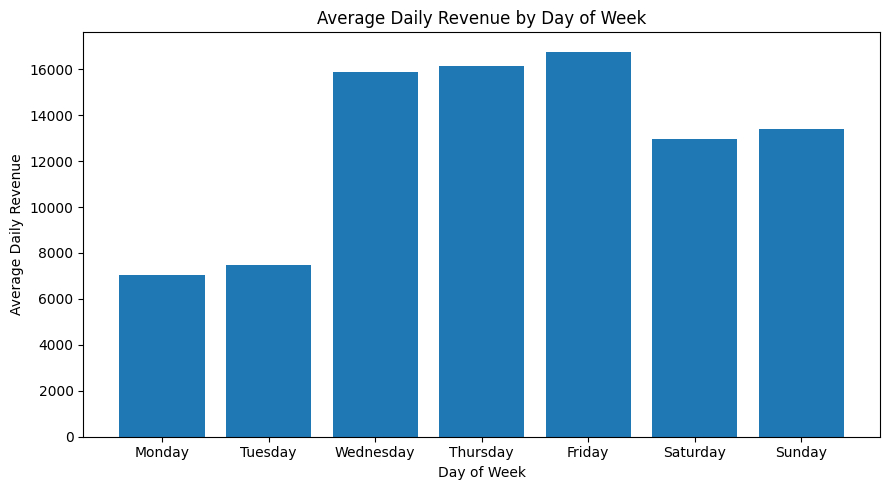




What strategies can be implemented to boost sales on slower days:
	Daily sales analysis reveals clear variability in performance across the week, with certain days consistently outperforming others in terms of revenue, order volume, and quantity sold. High-performing days likely benefit from stronger customer intent and habitual purchasing behavior, while low-performing days represent untapped demand rather than structural weakness. To boost sales on slower days, the company should introduce day-specific promotions, flash sales, and targeted digital campaigns timed to low-traffic periods, as well as incentives such as free delivery or limited-time bundles. By actively redistributing demand from peak to off-peak days, the business can smooth revenue volatility, improve capacity utilization, and drive incremental sales without increasing overall acquisition costs.


In [ ]:
# =========================================
# Question 20: Analyze daily sales trends to identify high-performing and low-performing days.
# =========================================

# Prepare date and revenue features
online_sales_df["Transaction_Date"] = pd.to_datetime(online_sales_df["Transaction_Date"])

online_sales_df["Revenue"] = online_sales_df["Quantity"] * online_sales_df["Avg_Price"]

# Aggregate daily sales
daily_sales_df = (
    online_sales_df.groupby(online_sales_df["Transaction_Date"].dt.date)
    .agg(
        Total_Revenue=("Revenue", "sum"), Total_Orders=("Transaction_ID", "nunique"), Total_Quantity=("Quantity", "sum")
    )
    .reset_index()
    .rename(columns={"Transaction_Date": "Date"})
)

print("Sample Daily Sales Data:")
print(daily_sales_df.head())
print()

# Identify Day of Week
daily_sales_df["Day_of_Week"] = pd.to_datetime(daily_sales_df["Date"]).dt.day_name()

# Aggregate performance by Day of Week
weekday_performance_df = (
    daily_sales_df.groupby("Day_of_Week")
    .agg(
        Avg_Daily_Revenue=("Total_Revenue", "mean"),
        Avg_Daily_Orders=("Total_Orders", "mean"),
        Avg_Daily_Quantity=("Total_Quantity", "mean"),
    )
    .reset_index()
)

# Order days logically
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

weekday_performance_df["Day_of_Week"] = pd.Categorical(
    weekday_performance_df["Day_of_Week"], categories=weekday_order, ordered=True
)

weekday_performance_df = weekday_performance_df.sort_values("Day_of_Week")

print("Average Performance by Day of Week:")
print(weekday_performance_df)
print()

# Identify High- and Low-Performing Days
highest_day = weekday_performance_df.loc[weekday_performance_df["Avg_Daily_Revenue"].idxmax()]

lowest_day = weekday_performance_df.loc[weekday_performance_df["Avg_Daily_Revenue"].idxmin()]

print(f"Highest Performing Day:\n{highest_day}\n")
print(f"Lowest Performing Day:\n{lowest_day}\n")
print()

# Visualization: Revenue by Day of Week
plt.figure(figsize=(9, 5))
plt.bar(weekday_performance_df["Day_of_Week"], weekday_performance_df["Avg_Daily_Revenue"])
plt.xlabel("Day of Week")
plt.ylabel("Average Daily Revenue")
plt.title("Average Daily Revenue by Day of Week")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# What strategies can be implemented to boost sales on slower days?
# -----------------------------------------
print(
    "What strategies can be implemented to boost sales on slower days:\n\tDaily sales analysis reveals clear variability in performance across the week, with certain days consistently outperforming others in terms of revenue, order volume, and quantity sold. "
    "High-performing days likely benefit from stronger customer intent and habitual purchasing behavior, while low-performing days represent untapped demand rather than structural weakness. "
    "To boost sales on slower days, the company should introduce day-specific promotions, flash sales, and targeted digital campaigns timed to low-traffic periods, as well as incentives such as free delivery or limited-time bundles. "
    "By actively redistributing demand from peak to off-peak days, the business can smooth revenue volatility, improve capacity utilization, and drive incremental sales without increasing overall acquisition costs."
)